In [14]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np
from scipy.optimize import curve_fit
plateaus = getters.get_plateaus()
rtdcalib = getters.get_rtdcal()

/eos/home-i01/j/jcapotor/SWAN_projects/FBG_TMS
/eos/home-i01/j/jcapotor/SWAN_projects/FBG_TMS/ana_tools/plateaus.json
/eos/home-i01/j/jcapotor/SWAN_projects/FBG_TMS
/eos/home-i01/j/jcapotor/SWAN_projects/FBG_TMS/ana_tools/rtd_calib.json


The aim of this presentation is to show to the IFIC neutrinos group the measurements taken during the 2023 February and March runs at the climatic chamber with the FBGS.

It has to clearly show the stability of the climatic chamber and the FBG setup used for those measurements, the stability of the FBG measurements and the current results with respect to the performance of the offsets between the FBG.

As a conclusion, a value that represents the current resolution in the temperature gradient by measuring it with FBGs, taking into account the appropriate sensitivity curves from each of the sensors.

# Index of the presentation

* Description of the runs: temperature profiles, humidity profiles, stability of the climatic chamber.
* Description of the setup: temperature accuracy, temperature stability, gradient stability and resolution.
* Characterisation of the FBGs: WL stability and reproducibility, WL offset stability and reproducibility comparison between coating types, calculation of the sensitivity curves and comparison with respect to the offered by the manufacturer.
* Conclusions: current temperature resolution with the actual reproducibilities considering the measured sensitivity curves.
* Next steps: further studies in the climatic chamber with controlled temperature and humidity profiles, cryogenic tests.


# Description of the Runs

## Temperature and Humidity profiles

To fill this section, select a representative temperature run and a humidity run and attach them to the presentation. They can be found in the respective *runs_characterisation* file from the appropriate folder.

### Temperature Runs

There a total of 8 temperature runs considering February and March:
* February Runs:
 * 20230221:
 * 20230222:
 * 20230223:
 * 20230224:
* March Runs:
 * 20230321:
 * 20230322:
 * 20230329:
 * 20230329:


Keys to read: ['Hum1', 'Hum2']


Reading humidity key: Hum: 100%|██████████| 2/2 [00:00<00:00, 15.11it/s]

The plateau at 273_down is 4 hours long
The plateau at 253_down is 4 hours long
The plateau at 233_down is 4 hours long
The plateau at 213_down is 4 hours long


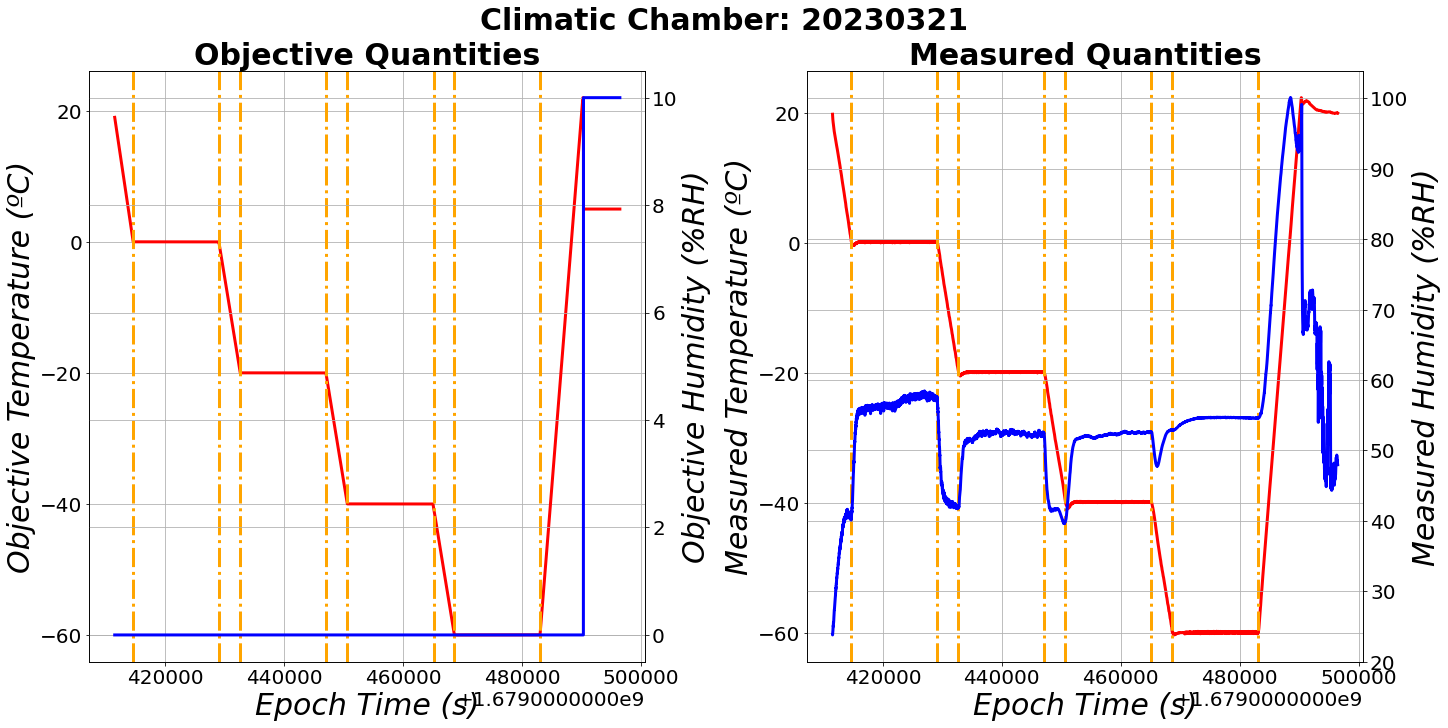

In [15]:
date = "20230321"
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
def plot_objective_observed(date):
    #axes[0] will containg the objective quantities, and axes[1] the measured ones by the climatic chamber
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    twin_axes = graphic_tools.get_twin_axes(axes)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date, fontsize=30, fontweight="bold")
    #The next line loads the raw data from the climatic chamber
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/", filetype="humidity", pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    axes[0].plot(climatic_chamber["Timestamp"], climatic_chamber["ObRH"], color="red", label="Objective Temperature")
    axes[0].set_ylabel("Objective Temperature (ºC)", fontsize=30, style="italic")
    axes[0].set_title("Objective Quantities", fontsize=30, fontweight="bold")
    twin_axes[0].plot(climatic_chamber["Timestamp"], climatic_chamber["ObT"], color="blue", label="Objective Humidity")
    twin_axes[0].set_ylabel("Objective Humidity (%RH)", fontsize=30, style="italic")
    axes[1].plot(climatic_chamber["Timestamp"], climatic_chamber["T"], color="red", label="Measured Temperature")
    axes[1].set_ylabel("Measured Temperature (ºC)", fontsize=30, style="italic")
    axes[1].set_title("Measured Quantities", fontsize=30, fontweight="bold")
    axes[0].set_xlabel("Epoch Time (s)", fontsize=30, style="italic")
    axes[1].set_xlabel("Epoch Time (s)", fontsize=30, style="italic")
    twin_axes[1].plot(climatic_chamber["Timestamp"], climatic_chamber["RH"], color="blue")
    twin_axes[1].set_ylabel("Measured Humidity (%RH)", fontsize=30, style="italic")
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        print(r"The plateau at {0} is {1:.0f} hours long".format(plateau, (tf-t0)/3600))
        axes[0].axvline(t0, linestyle="-.", color="orange")
        axes[0].axvline(tf, linestyle="-.", color="orange")
        axes[1].axvline(t0, linestyle="-.", color="orange")
        axes[1].axvline(tf, linestyle="-.", color="orange")
plot_objective_observed(date)

### Humidity Runs

There are a total of 3 humidity runs, all of them in March.

* 20230323:
* 20230327:
* 20230328:

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 30.60it/s]

The plateau at 20_up is 2 hours long
The plateau at 40_up is 2 hours long
The plateau at 60_up is 2 hours long
The plateau at 40_down is 2 hours long
The plateau at 20_down is 2 hours long
The plateau at 40_up2 is 2 hours long


The plateau at 60_up2 is 2 hours long


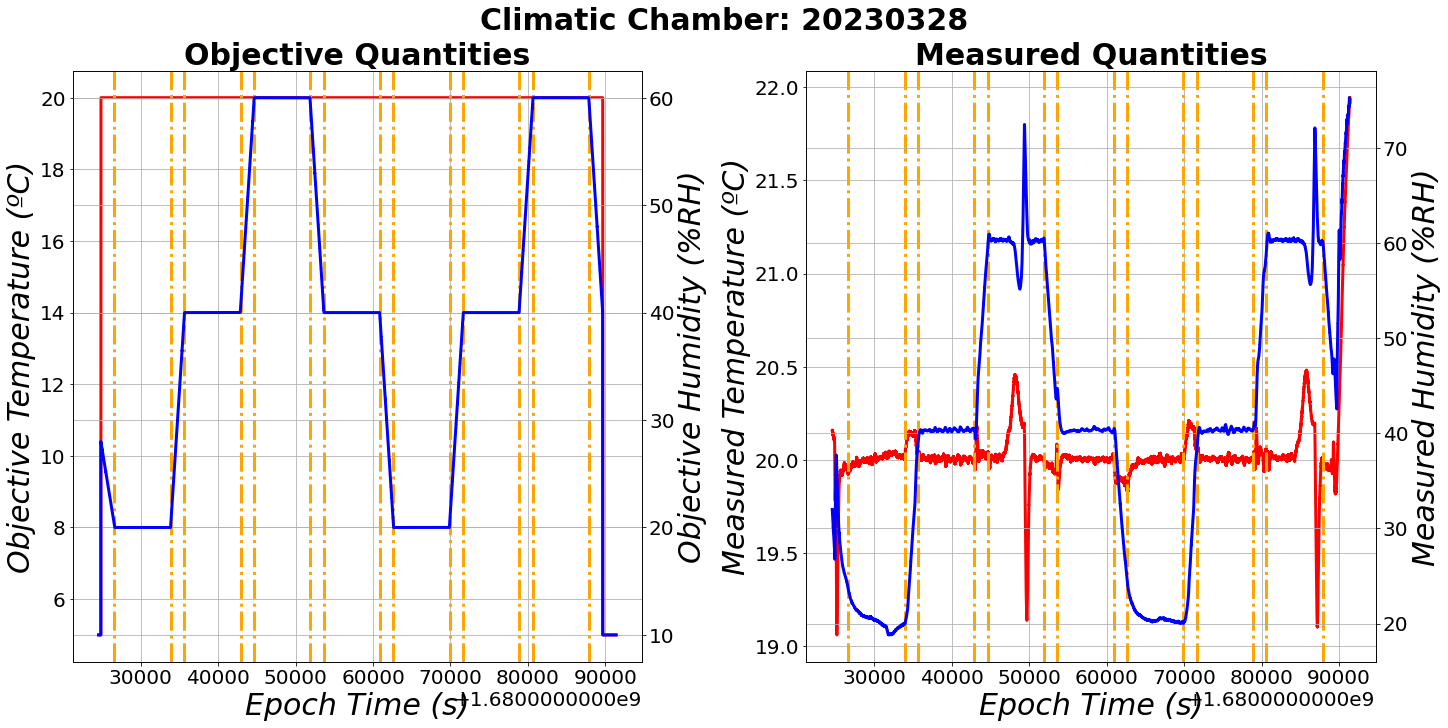

In [16]:
date = "20230328"
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
plot_objective_observed(date)

## Repeatibility & Stability of the climatic chamber

**Reproducibility**: At a certain temperature/humidity plateau, defined as the mean of the temperatures/humidities observed over different runs. The error associated to this quantity is calculated as the standard deviation of these observed temperatures/humidities.

**Stability**: At a certain temperature/humidity plateau, defined as the mean of the standard deviations of the temperatures/humidities observed over different runs. The error associated to this quantity is calculated as the standard deviation of the standards deviations of these observed quantities.

Two sets of plots will be generated to study the reproducibility:
* For the temperature runs: the temperature repeatibility as a function of the temperature plateau and the humidity repeatibility (that was set free for these runs) as a function of the temperature plateau.
* For the humidity runs: the humidity repeatibility as a function of the humidity plateau and the temperature repeatibility (that was set constant to 20ºC for all runs) as a function of the humidity plateau.

In each of the plots, the mean and rms of the reproducibilities errors are presented. These values represent the ability of the climatic chamber to reproduce over different cycles the same temperature value when set to reach the same temperature plateau.

Two sets of plots will be generated to study the stability:
* For the temperature runs: the temperature stability as a function of the temperature plateau and the humidity stability (that was set free for these runs) as a function of the temperature plateau.
* For the humidity runs: the humidity stability as a function of the humidity plateau and the temperature stability (that was set constant to 20ºC for all runs) as a function of the humidity plateau.

20230221
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

20230223


Keys to read: ['Hum2']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

20230224


Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 14.82it/s]


20230321
Keys to read: ['Hum1', 'Hum2']


Reading humidity key: Hum: 100%|██████████| 2/2 [00:00<00:00, 86.87it/s]


20230322
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 18.02it/s]

20230329


Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 36.85it/s]


Text(0.5, 0, 'Plateau Temperature (K)')

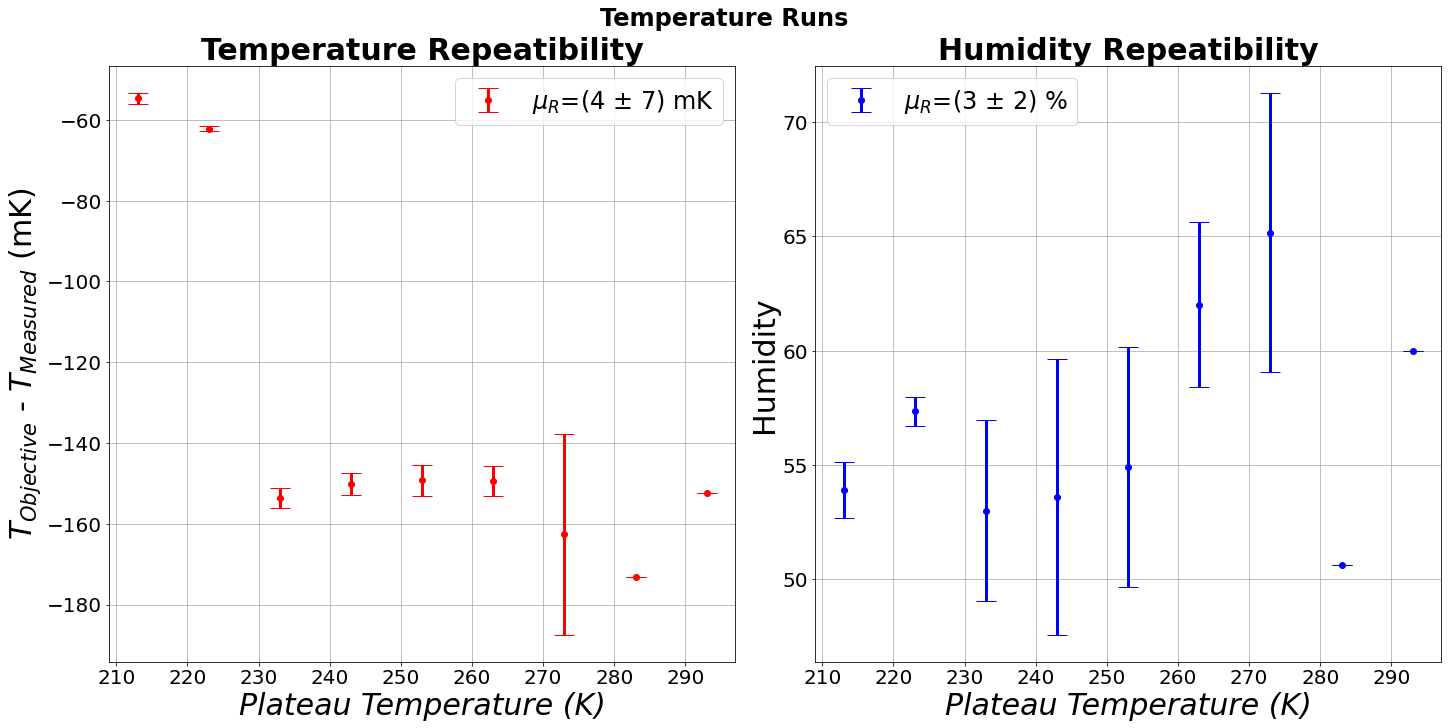

In [17]:
tdates = ["20230221", "20230223", "20230224", "20230321", "20230322", "20230329"]

fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Temperature Runs", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
TEMPS, HUMS = {}, {}
TEMPS_ERR, HUMS_ERR = {}, {}
for key in plateaus["20230224"].keys():
    if str(key.split("_")[1]) == "up":
        continue
    TEMPS[str(key.split("_")[0])] = []
    HUMS[str(key.split("_")[0])] = []
    TEMPS_ERR[str(key.split("_")[0])] = []
    HUMS_ERR[str(key.split("_")[0])] = []

for date in tdates:
    print(date)
    if "02" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
    if "03" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                            filetype="humidity",
                                            pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        temp = plateau.split("_")[0]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+2000)&(climatic_chamber["Timestamp"]<tf)]
        TEMPS[temp].append(np.mean((tcut["ObRH"] - tcut["T"]).values))
        HUMS[temp].append(np.mean((tcut["RH"]).values))
        TEMPS_ERR[temp].append(np.std((tcut["ObRH"] - tcut["T"]).values))
        HUMS_ERR[temp].append(np.std((tcut["RH"]).values))

accuracies, accuracies_err = [], []
accuracies_stab, accuracies_stab_err = [], []
humidities, humidities_err = [], []
humidities_stab, humidities_stab_err = [], []
temperatures = []
for temp in TEMPS.keys():
    temperatures.append(int(temp))
    accuracies.append(np.mean(TEMPS[temp]))
    accuracies_err.append(np.std(TEMPS[temp]))
    humidities.append(np.mean(HUMS[temp]))
    humidities_err.append(np.std(HUMS[temp]))
    accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
    accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))
    humidities_stab.append(np.mean(HUMS_ERR[temp]))
    humidities_stab_err.append(np.std(HUMS_ERR[temp]))

axes[0].errorbar(temperatures, 1e3*np.array(accuracies), fmt="o", capsize=10,
                      yerr=1e3*np.array(accuracies_err), color="red",
                label=r"$\mu_R$=({0:.0f} $\pm$ {1:.0f}) mK".format(1e3*np.mean(accuracies_err),
                                                                   1e3*np.std(accuracies_err)))
axes[1].errorbar(temperatures, np.array(humidities), fmt="o", capsize=10,
                      yerr=np.array(humidities_err), color="blue",
                label=r"$\mu_R$=({0:.0f} $\pm$ {1:.0f}) %".format(np.mean(humidities_err),
                                                                   np.std(humidities_err))
                )
axes[0].legend()
axes[1].legend()
axes[0].set_title("Temperature Repeatibility", fontsize=30, fontweight="bold")
axes[0].set_ylabel("$T_{Objective}$ - $T_{Measured}$ (mK)", fontsize=30)
axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
axes[1].set_title("Humidity Repeatibility", fontsize=30, fontweight="bold")
axes[1].set_ylabel("Humidity", fontsize=30)
axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")

20230221
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 70.71it/s]


20230223
Keys to read: ['Hum2']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 76.72it/s]


20230224
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 49.85it/s]


20230321
Keys to read: ['Hum1', 'Hum2']


Reading humidity key: Hum: 100%|██████████| 2/2 [00:00<00:00, 86.67it/s]


20230322
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 72.45it/s]


20230329
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 77.80it/s]


Text(0.5, 0, 'Plateau Temperature (K)')

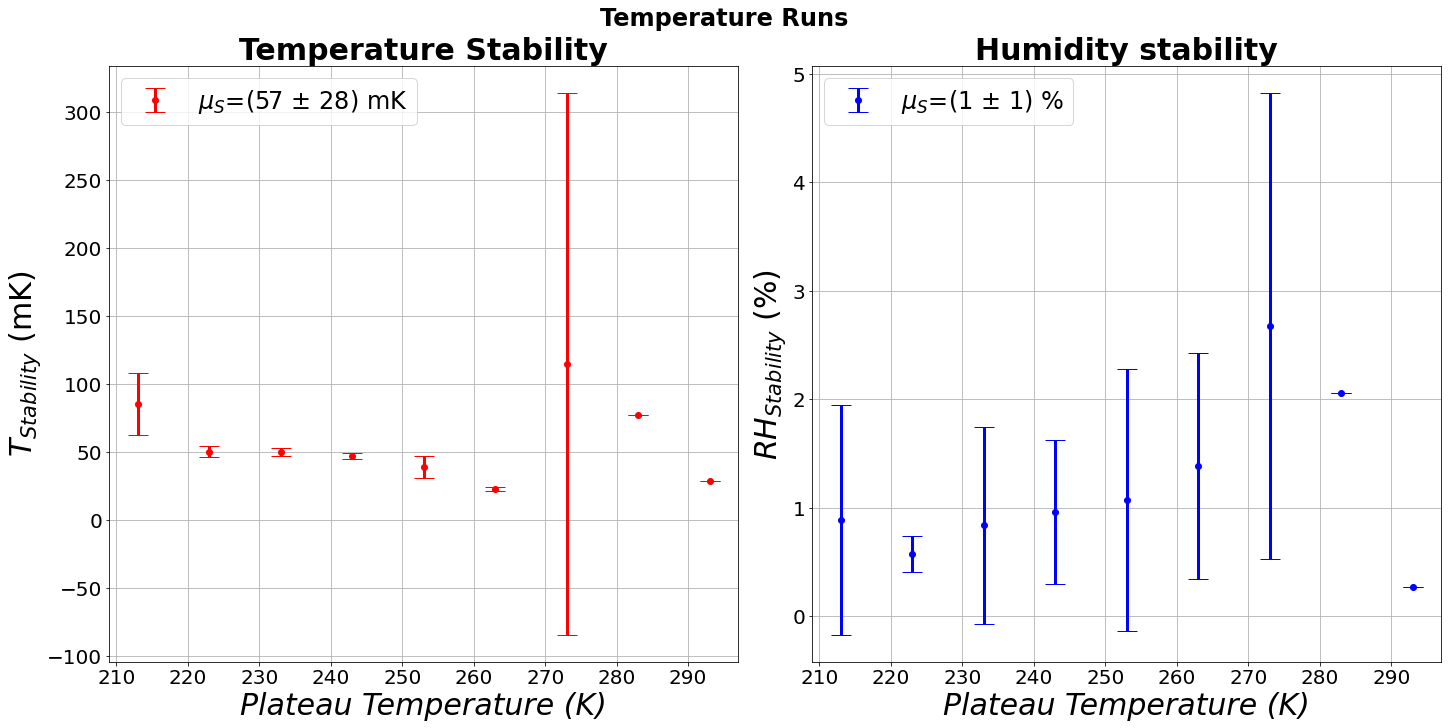

In [18]:
tdates = ["20230221", "20230223", "20230224", "20230321", "20230322", "20230329"]

fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Temperature Runs", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
TEMPS, HUMS = {}, {}
TEMPS_ERR, HUMS_ERR = {}, {}
for key in plateaus["20230224"].keys():
    if str(key.split("_")[1]) == "up":
        continue
    TEMPS[str(key.split("_")[0])] = []
    HUMS[str(key.split("_")[0])] = []
    TEMPS_ERR[str(key.split("_")[0])] = []
    HUMS_ERR[str(key.split("_")[0])] = []

for date in tdates:
    print(date)
    if "02" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
    if "03" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                            filetype="humidity",
                                            pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        temp = plateau.split("_")[0]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+2000)&(climatic_chamber["Timestamp"]<tf)]
        TEMPS[temp].append(np.mean((tcut["ObRH"] - tcut["T"]).values))
        HUMS[temp].append(np.mean((tcut["RH"]).values))
        TEMPS_ERR[temp].append(np.std((tcut["ObRH"] - tcut["T"]).values))
        HUMS_ERR[temp].append(np.std((tcut["RH"]).values))

accuracies, accuracies_err = [], []
accuracies_stab, accuracies_stab_err = [], []
humidities, humidities_err = [], []
humidities_stab, humidities_stab_err = [], []
temperatures = []
for temp in TEMPS.keys():
    temperatures.append(int(temp))
    accuracies.append(np.mean(TEMPS[temp]))
    accuracies_err.append(np.std(TEMPS[temp]))
    humidities.append(np.mean(HUMS[temp]))
    humidities_err.append(np.std(HUMS[temp]))
    accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
    accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))
    humidities_stab.append(np.mean(HUMS_ERR[temp]))
    humidities_stab_err.append(np.std(HUMS_ERR[temp]))

axes[0].errorbar(temperatures, 1e3*np.array(accuracies_stab),
                 yerr=1e3*np.array(accuracies_stab_err), fmt="o", color="red", capsize=10,
                label= r"$\mu_S$=({0:.0f} $\pm$ {1:.0f}) mK".format(1e3*np.mean(accuracies_stab),
                                                              1e3*np.std(accuracies_stab))
                )
axes[1].errorbar(temperatures, np.array(humidities_stab),
                 yerr=np.array(humidities_stab_err), fmt="o", color="blue", capsize=10,
                label= r"$\mu_S$=({0:.0f} $\pm$ {1:.0f}) %".format(np.mean(humidities_stab),
                                                              np.std(humidities_stab))
                )
#axes[0].fill_between(temperatures, -134+83, -134-83, color="red", alpha=0.5, label="Accuracy Uncertainty")
axes[0].legend()
#axes[1].fill_between(temperatures, 57+6, 57-6, color="blue", alpha=0.5, label="Humidity Uncertainty")
axes[1].legend()
axes[0].set_title("Temperature Stability", fontsize=30, fontweight="bold")
axes[0].set_ylabel("$T_{Stability}$ (mK)", fontsize=30)
axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
axes[1].set_title("Humidity stability", fontsize=30, fontweight="bold")
axes[1].set_ylabel("$RH_{Stability}$ (%)", fontsize=30)
axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")

20230323
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 37.80it/s]


20230327
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 25.63it/s]


20230328
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 74.07it/s]


Text(0.5, 0, 'Plateau Temperature (K)')

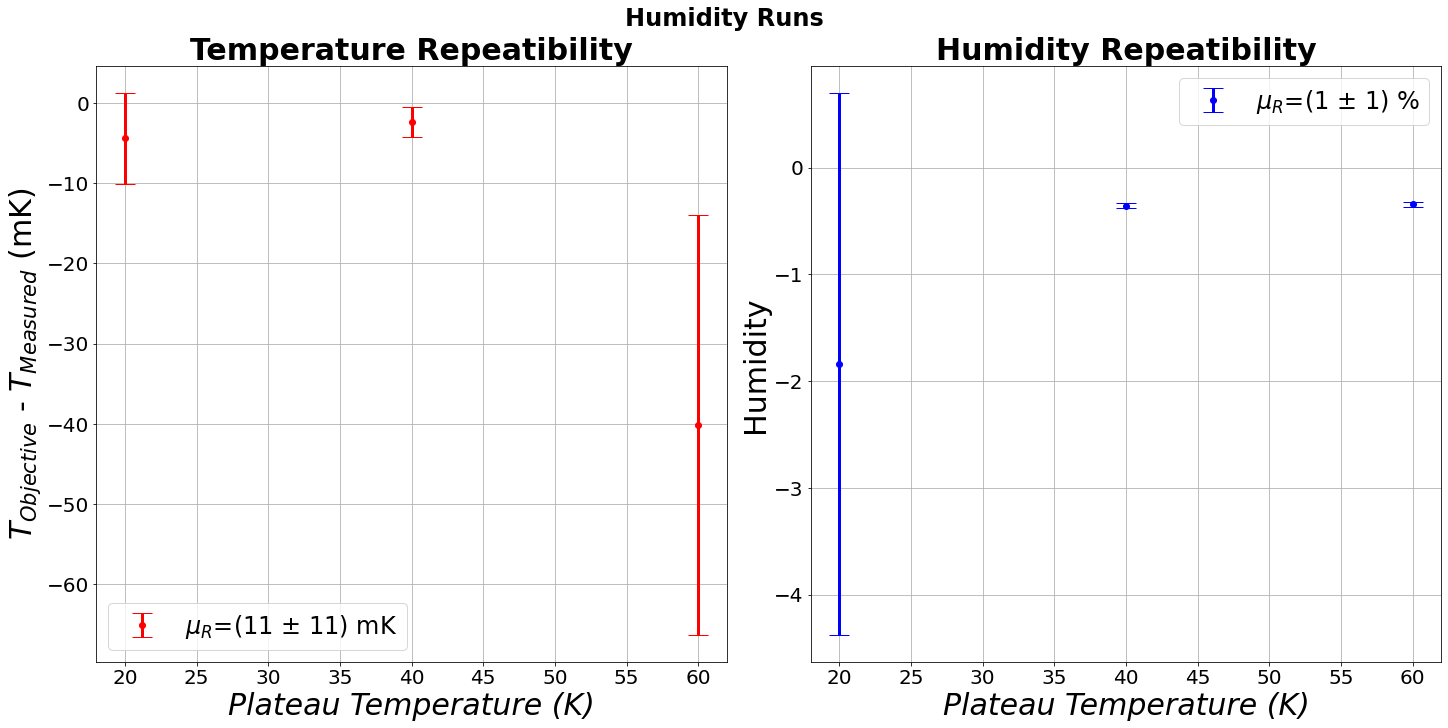

In [19]:
# HUMIDITY runs
hdates = ["20230323", "20230327", "20230328"]

fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Humidity Runs", fontweight="bold")
fig.set_size_inches((20,10))
TEMPS = {"20":[], "40":[], "60":[]}
HUMS = {"20":[], "40":[], "60":[]}
TEMPS_ERR = {"20":[], "40":[], "60":[]}
HUMS_ERR = {"20":[], "40":[], "60":[]}
for date in hdates:
    print(date)
    if "02" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
    if "03" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                            filetype="humidity",
                                            pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        temp = plateau.split("_")[0]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+2000)&(climatic_chamber["Timestamp"]<tf)]
        TEMPS[temp].append(np.mean((tcut["ObRH"] - tcut["T"]).values))
        HUMS[temp].append(np.mean((tcut["ObT"] - tcut["RH"]).values))
        TEMPS_ERR[temp].append(np.std((tcut["ObRH"] - tcut["T"]).values))
        HUMS_ERR[temp].append(np.std((tcut["ObT"] - tcut["RH"]).values))

accuracies, accuracies_err = [], []
accuracies_stab, accuracies_stab_err = [], []
humidities, humidities_err = [], []
humidities_stab, humidities_stab_err = [], []
temperatures = []
for temp in TEMPS.keys():
    temperatures.append(int(temp))
    accuracies.append(np.mean(TEMPS[temp]))
    accuracies_err.append(np.std(TEMPS[temp]))
    humidities.append(np.mean(HUMS[temp]))
    humidities_err.append(np.std(HUMS[temp]))
    accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
    accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))
    humidities_stab.append(np.mean(HUMS_ERR[temp]))
    humidities_stab_err.append(np.std(HUMS_ERR[temp]))

axes[0].errorbar(temperatures, 1e3*np.array(accuracies), fmt="o", capsize=10,
                      yerr=1e3*np.array(accuracies_err), color="red",
                label=r"$\mu_R$=({0:.0f} $\pm$ {1:.0f}) mK".format(1e3*np.mean(accuracies_err),
                                                                   1e3*np.std(accuracies_err)))
axes[1].errorbar(temperatures, np.array(humidities), fmt="o", capsize=10,
                      yerr=np.array(humidities_err), color="blue",
                label=r"$\mu_R$=({0:.0f} $\pm$ {1:.0f}) %".format(np.mean(humidities_err),
                                                                   np.std(humidities_err))
                )
#axes[0].fill_between(temperatures, -1+2, -1-2, color="blue", alpha=0.5, label="Accuracy Uncertainty")
axes[0].legend()
#axes[1].fill_between(temperatures, -12+84, -12-84, color="red", alpha=0.5, label="Accuracy Uncertainty")
axes[1].legend()
axes[0].set_title("Temperature Repeatibility", fontsize=30, fontweight="bold")
axes[0].set_ylabel("$T_{Objective}$ - $T_{Measured}$ (mK)", fontsize=30)
axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
axes[1].set_title("Humidity Repeatibility", fontsize=30, fontweight="bold")
axes[1].set_ylabel("Humidity", fontsize=30)
axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")

20230323
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 74.81it/s]


20230327
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 67.60it/s]


20230328
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 77.08it/s]


Text(0.5, 0, 'Plateau Humidity (%)')

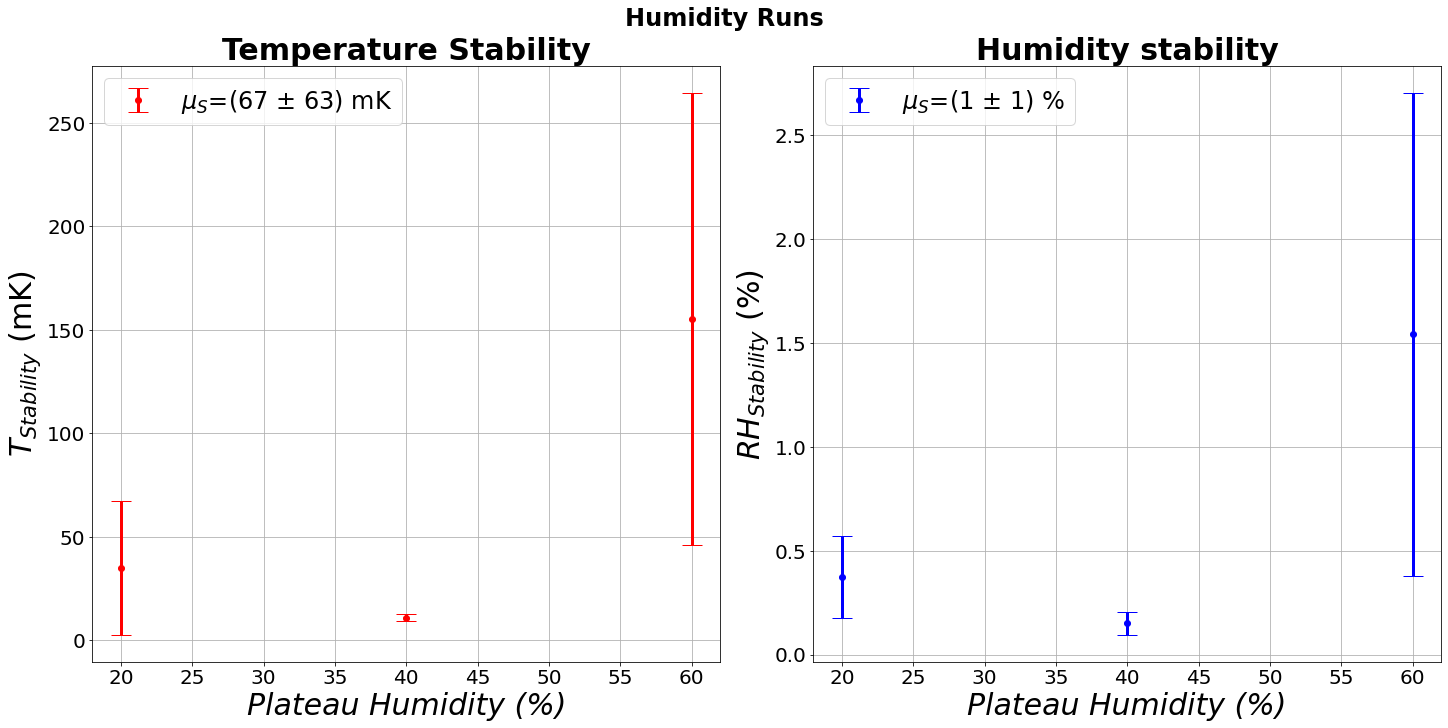

In [20]:
# HUMIDITY runs
hdates = ["20230323", "20230327", "20230328"]

fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Humidity Runs", fontweight="bold")
fig.set_size_inches((20,10))
TEMPS = {"20":[], "40":[], "60":[]}
HUMS = {"20":[], "40":[], "60":[]}
TEMPS_ERR = {"20":[], "40":[], "60":[]}
HUMS_ERR = {"20":[], "40":[], "60":[]}
for date in hdates:
    print(date)
    if "02" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
    if "03" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                            filetype="humidity",
                                            pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        temp = plateau.split("_")[0]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+2000)&(climatic_chamber["Timestamp"]<tf)]
        TEMPS[temp].append(np.mean((tcut["ObRH"] - tcut["T"]).values))
        HUMS[temp].append(np.mean((tcut["RH"]).values))
        TEMPS_ERR[temp].append(np.std((tcut["ObRH"] - tcut["T"]).values))
        HUMS_ERR[temp].append(np.std((tcut["RH"]).values))

accuracies, accuracies_err = [], []
accuracies_stab, accuracies_stab_err = [], []
humidities, humidities_err = [], []
humidities_stab, humidities_stab_err = [], []
temperatures = []
for temp in TEMPS.keys():
    temperatures.append(int(temp))
    accuracies.append(np.mean(TEMPS[temp]))
    accuracies_err.append(np.std(TEMPS[temp]))
    humidities.append(np.mean(HUMS[temp]))
    humidities_err.append(np.std(HUMS[temp]))
    accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
    accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))
    humidities_stab.append(np.mean(HUMS_ERR[temp]))
    humidities_stab_err.append(np.std(HUMS_ERR[temp]))

axes[0].errorbar(temperatures, 1e3*np.array(accuracies_stab),
                 yerr=1e3*np.array(accuracies_stab_err), fmt="o", color="red", capsize=10,
                label= r"$\mu_S$=({0:.0f} $\pm$ {1:.0f}) mK".format(1e3*np.mean(accuracies_stab),
                                                              1e3*np.std(accuracies_stab))
                )
axes[1].errorbar(temperatures, np.array(humidities_stab),
                 yerr=np.array(humidities_stab_err), fmt="o", color="blue", capsize=10,
                label= r"$\mu_S$=({0:.0f} $\pm$ {1:.0f}) %".format(np.mean(humidities_stab),
                                                              np.std(humidities_stab))
                )
#axes[0].fill_between(temperatures, -134+83, -134-83, color="red", alpha=0.5, label="Accuracy Uncertainty")
axes[0].legend()
#axes[1].fill_between(temperatures, 57+6, 57-6, color="blue", alpha=0.5, label="Humidity Uncertainty")
axes[1].legend()
axes[0].set_title("Temperature Stability", fontsize=30, fontweight="bold")
axes[0].set_ylabel("$T_{Stability}$ (mK)", fontsize=30)
axes[0].set_xlabel("Plateau Humidity (%)", fontsize=30, style="italic")    
axes[1].set_title("Humidity stability", fontsize=30, fontweight="bold")
axes[1].set_ylabel("$RH_{Stability}$ (%)", fontsize=30)
axes[1].set_xlabel("Plateau Humidity (%)", fontsize=30, style="italic")

# Description of the setup

## Stabilisation Times

The purpose of this analysis is to find the needed time for temperature to reach the plateau value for the temperature runs.

To do so, one can select the plateaus from the objective quantities from the climatic chamber. Applying these time cuts, it turns out that the approach of the temperature to the plateau value has an exponential shape.

By fitting an exponential curve to the original plateau data one can obtain the fit parameters. To find the time at which the temperature has became stable, one has to define a certain tolerance. The tolerance is defined as the RMS of the difference between the exponential fit and the plateau data. The time $\tau$ at which the temperature reaches the plateau value plus the tolerance, is the stabilisation time.

By doing this to each of the plateaus from all runs and by histogramming these $\tau$ values, one can find the average optimal stabilisation time that produces the most reliable temperature plateaus. So, to each of the initial plateau times from the climatic chamber one has to add $\mu_{\tau} + \sigma_{\tau}$ in order to properly select the plateau times.

In [21]:
def line(x, A, B):
    return A + B*x

def exp(x, A, B, C):
    return C+A*np.exp(-x/B)

def log(x, A, B, C):
    return C+A*np.exp(-x/B)

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 20.52it/s]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 18.87it/s]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Keys to read: ['Temp1', 'Temp2']


Reading temperature key: Temp: 100%|██████████| 2/2 [00:00<00:00, 21.20it/s]
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 15.47it/s]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]


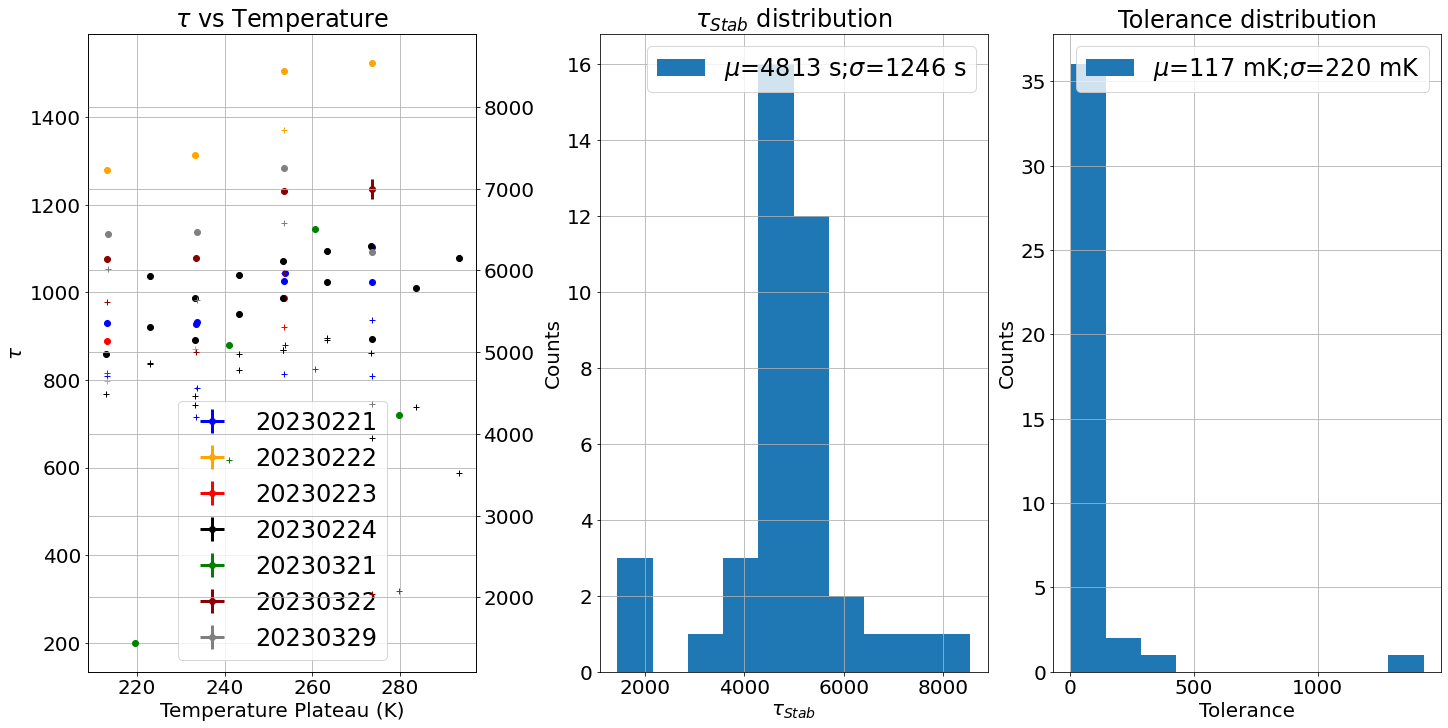

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [22]:
ids = {"T1":"37129", "T2":"39643"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
def plot_stabilization_time(date, ids, ncols, nrows, show=True, filetype="temperature"):
    if "02" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
    if "03" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
    if filetype == "temperature":
        pol="Temp"
        sens="T1"
    if filetype == "peaks":
        pol = "Av"
        sens="Wav1-1"
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype=filetype,
                                pol=pol).sort_values(by="Timestamp").reset_index(drop=True)
    n_plateaus = len(plateaus[date].keys())
    fig, axes = graphic_tools.make_figure(ncols=ncols, nrows=nrows)
    fig.set_size_inches(20, 10)
    fig.suptitle("Setup: " + date)
    cnt = 0
    taus, taus_err = [], []
    temps, temps_err = [], []
    tolerances, tinfs = [], []
    for plateau in plateaus[date].keys():
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
        axes[cnt].plot(tcut["Timestamp"]-t0, tcut[sens])
        axes[cnt].set_title(plateau)
        axes[cnt].set_xlabel("Time (s)")
        axes[cnt].set_ylabel("Temperature (K)")
        if "down" in plateau.split("_")[1]:
            popt, pcov = curve_fit(exp, tcut["Timestamp"]-t0,
                                   tcut[sens],
                                   p0=[int(plateau.split("_")[0]), 200, int(plateau.split("_")[0])])
            axes[cnt].plot(
                tcut["Timestamp"]-t0,
                exp(tcut["Timestamp"]-t0,
                popt[0], popt[1], popt[2]),
                label=r"$\tau$={0:.1f} s".format(popt[1]))
        if "up" in plateau.split("_")[1]:
            popt, pcov = curve_fit(log, tcut["Timestamp"]-t0,
                                   tcut[sens],
                                   p0=[-int(plateau.split("_")[0]), 200, int(plateau.split("_")[0])])
            axes[cnt].plot(
                tcut["Timestamp"]-t0,
                exp(tcut["Timestamp"]-t0,
                popt[0], popt[1], popt[2]),
                label=r"$\tau$={0:.1f} s".format(popt[1]))
        tolerance=np.std(tcut[sens]-exp(tcut["Timestamp"]-t0, popt[0], popt[1], popt[2]))
        errors=np.sqrt(np.diag(pcov))
        tinf = popt[1]*np.log(abs(popt[0])/tolerance)
        axes[cnt].axvline(tinf)
        axes[cnt].legend()
        if show == True:
            print("{0} Stabilisation time: {1:.0f} s for tolerance {2:.0f} mK".format(plateau, tinf, tolerance*1e3))
        temps.append(popt[2])
        taus.append(popt[1])
        temps_err.append(errors[2])
        taus_err.append(errors[1])
        tolerances.append(tolerance*1e3)
        tinfs.append(tinf)
        cnt+=1
    axes[-1].errorbar(temps, taus, xerr=temps_err, yerr=taus_err, fmt="o", label=r"$\tau$")
    axes[-1].set_title("Stab. time vs Temp")
    axes[-1].set_xlabel("Temperature (K)")
    axes[-1].set_ylabel("Stab. Times (s)")
    axes[-1].legend()
    if show == False:
        fig.clf()
    return temps, temps_err, taus, taus_err, tolerances, tinfs

def make_stabilisation_summary(filetype="temperature", show="False"):
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=1)
    twin_axes = axes[0].twinx()
    fig.set_size_inches((20,10))
    colors = {"20230221":"blue", "20230222":"orange", "20230223":"red", "20230224":"black",
             "20230321":"green", "20230322":"darkred", "20230329":"grey"}
    tolerance = []
    tau = []
    tinf = []
    for date in ["20230221", "20230222", "20230223", "20230224", "20230321", "20230322", "20230329"]:
        temps, temps_err, taus, taus_err, tolerances, tinfs = plot_stabilization_time(date,
                                                                                      ids,
                                                                                      filetype=filetype,
                                                                                      ncols=4, nrows=4, show=show)
        axes[0].errorbar(
            temps,
            taus,
            xerr=temps_err,
            yerr=taus_err,
            label=date,
            fmt="o",
            color=colors[date]
        )
        twin_axes.errorbar(
            temps,
            tinfs,
            xerr=temps_err,
            label=date,
            fmt="+",
            color=colors[date]
        )
        tolerance += tolerances
        tau += taus
        tinf += tinfs
    if filetype=="temperature":
        axes[2].hist(tolerance, label=r"$\mu$={0:.0f} mK;$\sigma$={1:.0f} mK".format(np.mean(tolerance), np.std(tolerance)))
        axes[1].hist(tinf, label=r"$\mu$={0:.0f} s;$\sigma$={1:.0f} s".format(np.mean(tinf), np.std(tinf)))
        axes[0].set_title(r"$\tau$ vs Temperature")
        axes[0].set_xlabel("Temperature (K)")
    if filetype=="peaks":
        axes[2].hist(tolerance, label=r"$\mu$={0:.3f} pm;$\sigma$={1:.3f} pm".format(np.mean(tolerance)*1e9, 1e9*np.std(tolerance)))
        axes[1].hist(tinf, label=r"$\mu$={0:.0f} s;$\sigma$={1:.0f} s".format(np.mean(tinf), np.std(tinf)))
        axes[0].set_title(r"$\tau$ vs Wavelength")
        axes[0].set_xlabel("Wavelength (m)")
    axes[0].set_ylabel(r"$\tau$")
    axes[0].set_xlabel(r"Temperature Plateau (K)")
    axes[1].set_title(r"$\tau_{Stab}$ distribution")
    axes[1].set_xlabel(r"$\tau_{Stab}$")
    axes[1].set_ylabel("Counts")
    axes[2].set_title(r"Tolerance distribution")
    axes[2].set_xlabel(r"Tolerance")
    axes[2].set_ylabel("Counts")
    axes[0].legend()
    axes[1].legend()
    axes[2].legend() 
    tau = np.round(np.mean(tinf) + np.std(tinf), 0)
    return tau
tau = make_stabilisation_summary(filetype="temperature", show=False)

In [23]:
print(r"The mean stabilisation time to apply to all time cuts is {0:.0f} s".format(tau))

The mean stabilisation time to apply to all time cuts is 6060 s


## Calibration of the RTDs

On 20230227 we performed a calibration run for the RTDs. To do so, we put the 6 RTDs that we were planning to use inside the aluinum cylinder and programmed a 3-plateau temperature run. In that way, we could obtain the calibration constants between any pair of sensors.

These calibrations constants can be used in order to relatively calibrate the RTDs. By using them, we can obtain the **real** temperature gradient between a pair of sensors.

The calibration constants are stored in a json file: rtd_calibs.json and can be accessed by calling the appropriate function.

As the calibration constants depend on temperature linearly, what is stored in the json files are the two parameters that characterisze each of the calibration constants line. They are labelled by the sensor ID, and can be easily used.

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 16.94it/s]

/eos/home-i01/j/jcapotor/SWAN_projects/FBG_TMS
/eos/home-i01/j/jcapotor/SWAN_projects/FBG_TMS/ana_tools/rtd_calib.json
The stored values for the calibration constants are the follwoing: 
{'37129': {'37129': [0.0, 0.0], '39643': [-0.05355979725765988, -0.000189489322329003], '39668': [-0.04074641175475156, -0.00028580745503842617], '40527': [0.11661518527942978, -0.0009602743818721243], '44120': [0.02993648529178848, 0.00013517573028700314], '39617': [-0.06637272921883534, -0.00013650204590658226]}, '39643': {'37129': [0.05355979725765989, 0.00018948932232900297], '39643': [0.0, 0.0], '39668': [0.012813384995504317, -9.63181307038738e-05], '40527': [0.17017498259625927, -0.0007707850597769933], '44120': [0.08349628239429051, 0.00032466505322927827], '39617': [-0.012812932180693556, 5.2987277290081216e-05]}, '39668': {'37129': [0.04074641175475155, 0.0002858074550384263], '39643': [-0.012813384995504305, 9.631813070387376e-05], '39668': [0.0, 0.0], '40527': [0.15736159728625312, -0.00067

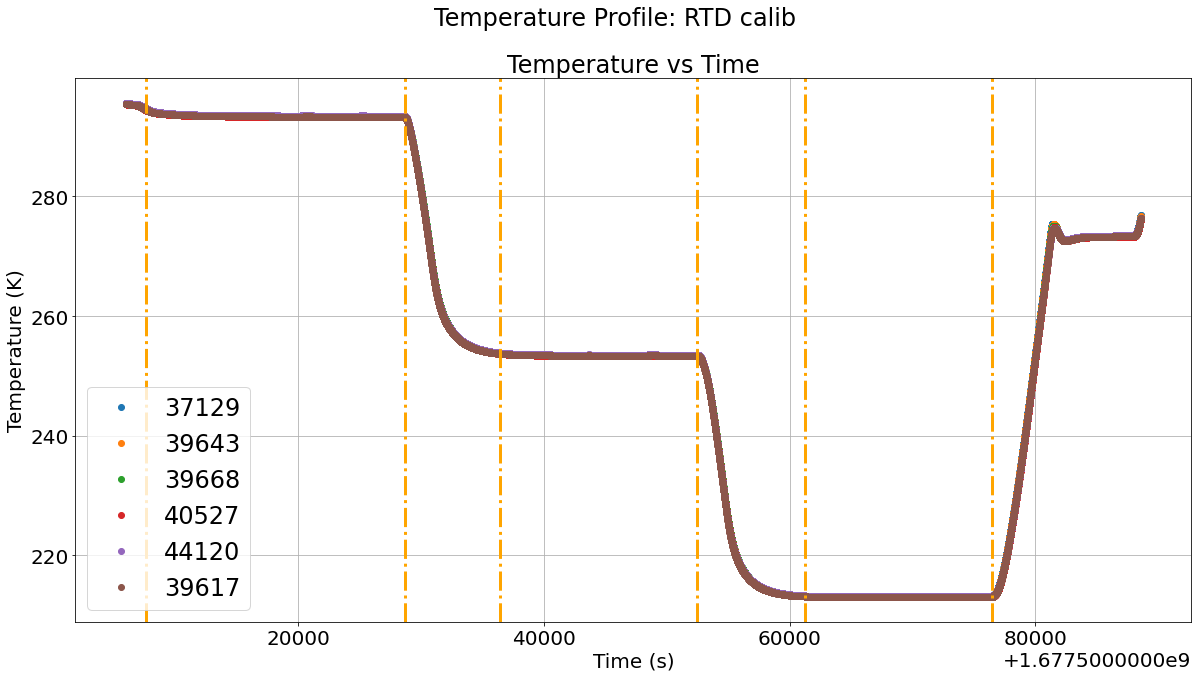

In [24]:
date = "20230227"
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
rtds = getters.get_raw_data(path_to_split=path+date+"/", filetype="temperature", pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
ids = {"T1":"37129", "T2":"39643", "T3":"39668", "T4":"40527", "T5":"44120", "T6":"39617"}
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((20,10))
fig.suptitle("Temperature Profile: RTD calib")
for sens in rtds.columns:
    if sens == "Timestamp" or sens == "Time" or sens == "Date":
        continue
    axes.plot(rtds["Timestamp"], rtds[sens], "o", label=ids[sens])
axes.set_title("Temperature vs Time")
axes.set_xlabel("Time (s)")
axes.set_ylabel("Temperature (K)")
axes.legend(loc="lower left")
for plateau in plateaus[date]:
    t0 = plateaus[date][plateau][0]
    tf = plateaus[date][plateau][1]
    axes.axvline(t0, color="orange", linestyle="-.")
    axes.axvline(tf, color="orange", linestyle="-.")
cc = getters.get_rtdcal()
print("The stored values for the calibration constants are the follwoing: ")
print(cc)

## RTDs repeatibility and stability

The exact same procedure as for the climatic chamber sensor has been reproduced. The same definitions for the reproducibility and stability are used for this characterisation.

In the following lines, the reproducibility for the "absolute" temperature measurement with respect to the objective plateau temperature and the temperature gradient between the sensors RTD1 & RTD2 are presented.

20230221
Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 14.32it/s]

20230223


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 32.67it/s]


20230224
Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]


20230321
Keys to read: ['Temp1', 'Temp2']


Reading temperature key: Temp: 100%|██████████| 2/2 [00:00<00:00, 38.12it/s]


20230322
Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 22.04it/s]


20230329
Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 24.63it/s]


Text(0.5, 0, 'Plateau Temperature (K)')

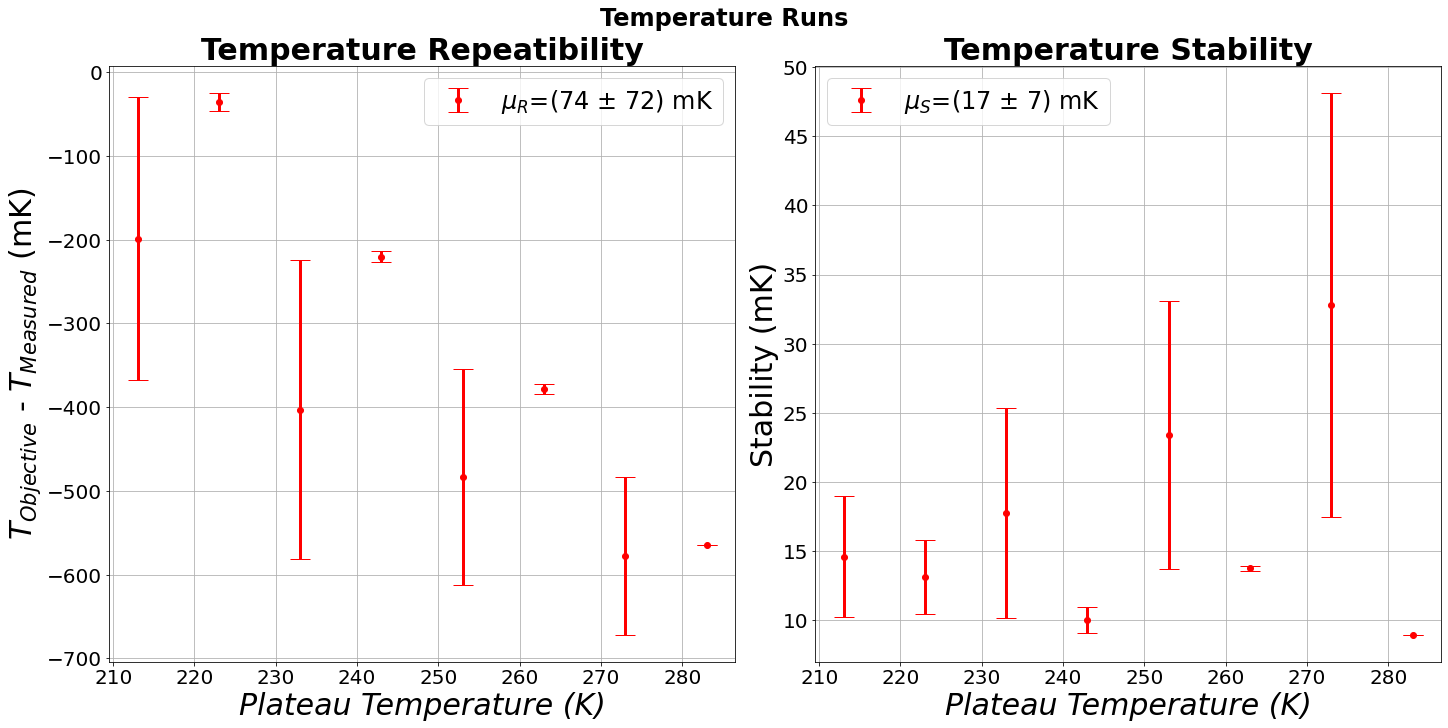

In [32]:
tdates = ["20230221", "20230223", "20230224", "20230321", "20230322", "20230329"]

fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Temperature Runs", fontweight="bold")
fig.set_size_inches((20,10))
sens = ["T1"]
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
TEMPS, HUMS = {}, {}
TEMPS_ERR, HUMS_ERR = {}, {}
for key in plateaus["20230224"].keys():
    if "293" in key:
        continue
    if str(key.split("_")[1]) == "up":
        continue
    TEMPS[str(key.split("_")[0])] = []
    HUMS[str(key.split("_")[0])] = []
    TEMPS_ERR[str(key.split("_")[0])] = []
    HUMS_ERR[str(key.split("_")[0])] = []

for date in tdates:
    print(date)
    if "202302" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
    if "202303" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                            filetype="temperature",
                                            pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        temp = plateau.split("_")[0]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
        if len(tcut) < 1000:
            continue
        if (np.std((int(temp) - tcut[sens]).values)) > 1e-1:
            continue
        TEMPS[temp].append(np.mean((int(temp) - tcut[sens]).values))
        TEMPS_ERR[temp].append(np.std((int(temp) - tcut[sens]).values))

accuracies, accuracies_err = [], []
accuracies_stab, accuracies_stab_err = [], []
temperatures = []
for temp in TEMPS.keys():
    temperatures.append(int(temp))
    accuracies.append(np.mean(TEMPS[temp]))
    accuracies_err.append(np.std(TEMPS[temp]))
    accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
    accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

axes[0].errorbar(temperatures, 1e3*np.array(accuracies), fmt="o", capsize=10,
                      yerr=1e3*np.array(accuracies_err), color="red",
                label=r"$\mu_R$=({0:.0f} $\pm$ {1:.0f}) mK".format(1e3*np.mean(accuracies_err),
                                                                   1e3*np.std(accuracies_err)))
axes[1].errorbar(temperatures, 1e3*np.array(accuracies_stab), fmt="o", capsize=10,
                      yerr=1e3*np.array(accuracies_stab_err), color="red",
                label=r"$\mu_S$=({0:.0f} $\pm$ {1:.0f}) mK".format(1e3*np.mean(accuracies_stab),
                                                                   1e3*np.std(accuracies_stab)))
axes[0].legend()
axes[1].legend()
axes[0].set_title("Temperature Repeatibility", fontsize=30, fontweight="bold")
axes[0].set_ylabel("$T_{Objective}$ - $T_{Measured}$ (mK)", fontsize=30)
axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
axes[1].set_title("Temperature Stability", fontsize=30, fontweight="bold")
axes[1].set_ylabel("Stability (mK)", fontsize=30)
axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

20230224
Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 14.30it/s]


Text(0.5, 0, 'Plateau Temperature (K)')

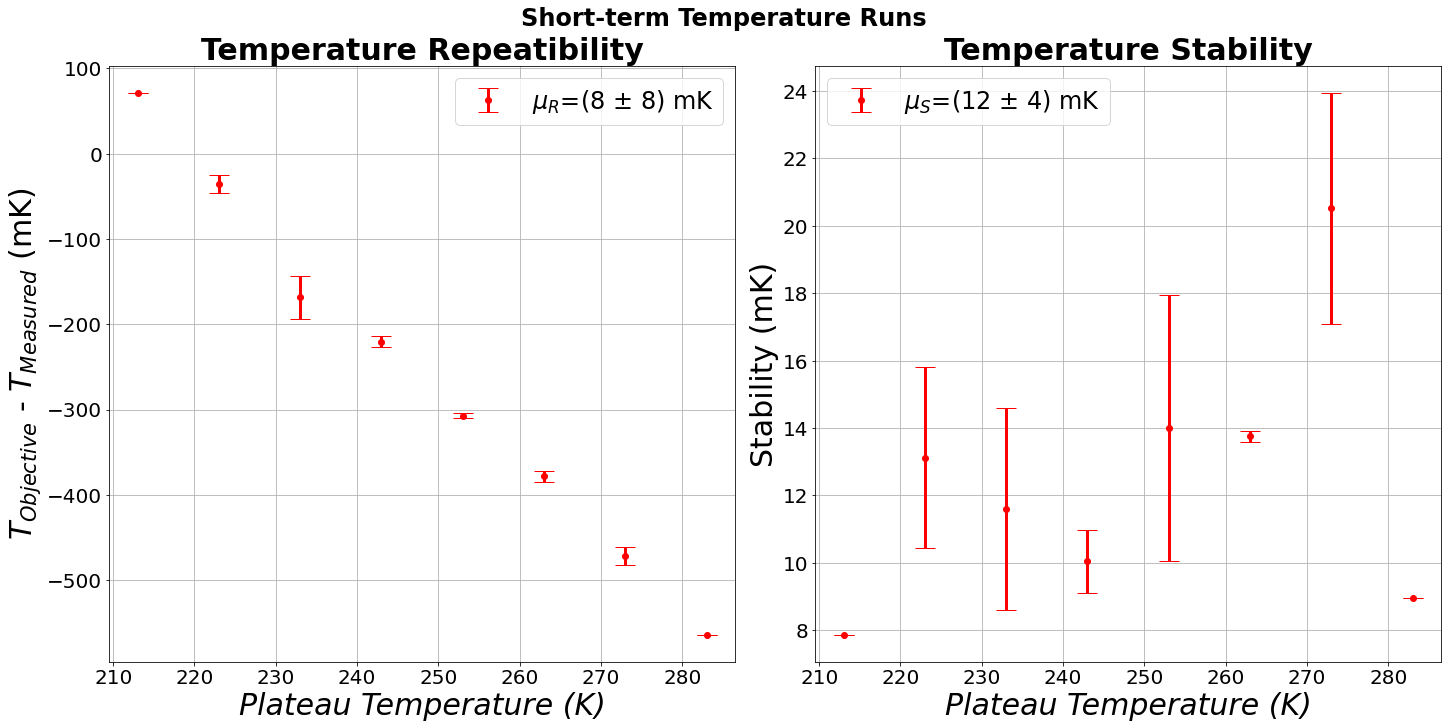

In [34]:
tdates = ["20230224"]

fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Short-term Temperature Runs", fontweight="bold")
fig.set_size_inches((20,10))
sens = ["T1"]
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
TEMPS, HUMS = {}, {}
TEMPS_ERR, HUMS_ERR = {}, {}
for key in plateaus["20230224"].keys():
    if "293" in key:
        continue
    if str(key.split("_")[1]) == "up":
        continue
    TEMPS[str(key.split("_")[0])] = []
    HUMS[str(key.split("_")[0])] = []
    TEMPS_ERR[str(key.split("_")[0])] = []
    HUMS_ERR[str(key.split("_")[0])] = []

for date in tdates:
    print(date)
    if "202302" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
    if "202303" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                            filetype="temperature",
                                            pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        temp = plateau.split("_")[0]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
        if len(tcut) < 1000:
            continue
        if (np.std((int(temp) - tcut[sens]).values)) > 1e-1:
            continue
        TEMPS[temp].append(np.mean((int(temp) - tcut[sens]).values))
        TEMPS_ERR[temp].append(np.std((int(temp) - tcut[sens]).values))

accuracies, accuracies_err = [], []
accuracies_stab, accuracies_stab_err = [], []
temperatures = []
for temp in TEMPS.keys():
    temperatures.append(int(temp))
    accuracies.append(np.mean(TEMPS[temp]))
    accuracies_err.append(np.std(TEMPS[temp]))
    accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
    accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

axes[0].errorbar(temperatures, 1e3*np.array(accuracies), fmt="o", capsize=10,
                      yerr=1e3*np.array(accuracies_err), color="red",
                label=r"$\mu_R$=({0:.0f} $\pm$ {1:.0f}) mK".format(1e3*np.mean(accuracies_err),
                                                                   1e3*np.std(accuracies_err)))
axes[1].errorbar(temperatures, 1e3*np.array(accuracies_stab), fmt="o", capsize=10,
                      yerr=1e3*np.array(accuracies_stab_err), color="red",
                label=r"$\mu_S$=({0:.0f} $\pm$ {1:.0f}) mK".format(1e3*np.mean(accuracies_stab),
                                                                   1e3*np.std(accuracies_stab)))
axes[0].legend()
axes[1].legend()
axes[0].set_title("Temperature Repeatibility", fontsize=30, fontweight="bold")
axes[0].set_ylabel("$T_{Objective}$ - $T_{Measured}$ (mK)", fontsize=30)
axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
axes[1].set_title("Temperature Stability", fontsize=30, fontweight="bold")
axes[1].set_ylabel("Stability (mK)", fontsize=30)
axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

20230221
Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 19.21it/s]


20230222
Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 18.05it/s]


20230223
Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 40.91it/s]


20230224
Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 16.26it/s]


20230321
Keys to read: ['Temp1', 'Temp2']


Reading temperature key: Temp: 100%|██████████| 2/2 [00:00<00:00, 50.89it/s]


20230322
Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 27.41it/s]


20230329
Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 31.54it/s]


Text(0.5, 0, 'Plateau Temperature (K)')

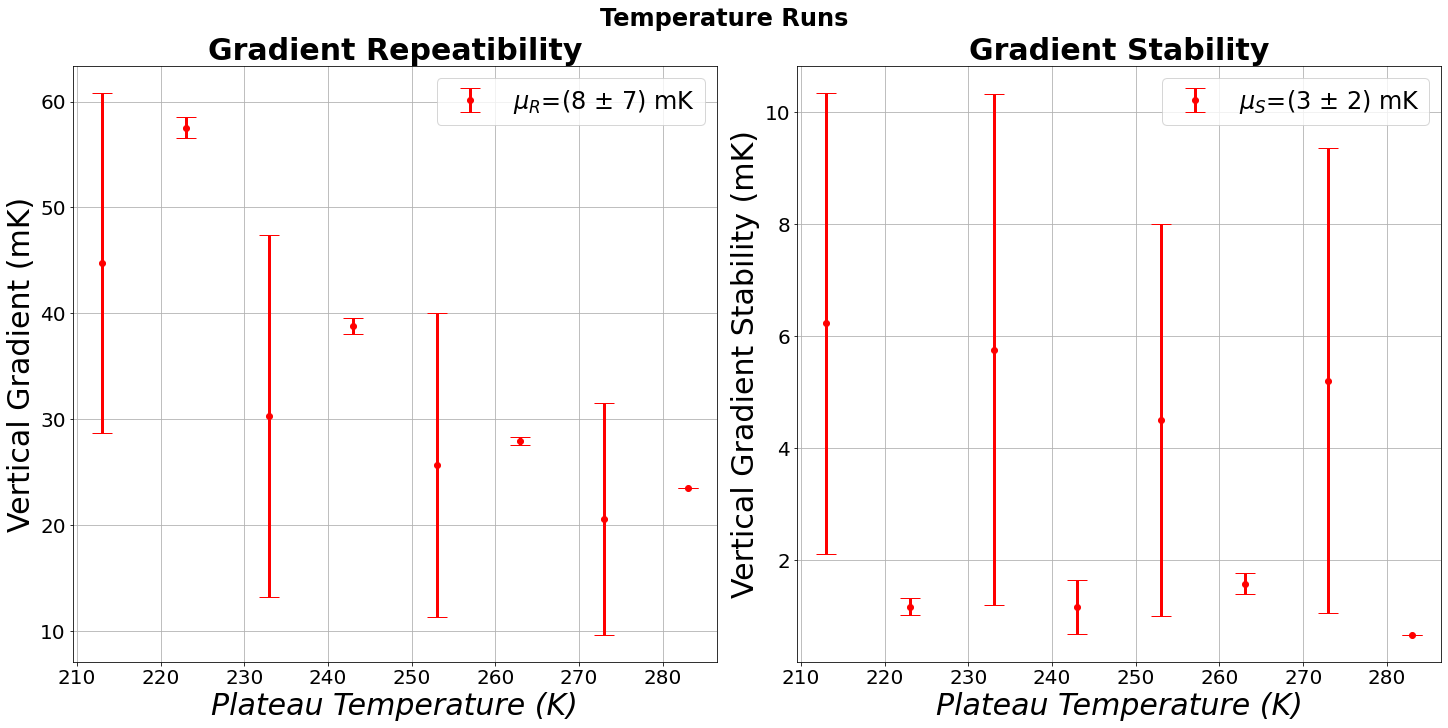

In [35]:
tdates = ["20230221", "20230222", "20230223", "20230224", "20230321", "20230322", "20230329"]

fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Temperature Runs", fontweight="bold")
fig.set_size_inches((20,10))
sens = "T1"
ref = "T2"
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
TEMPS, HUMS = {}, {}
TEMPS_ERR, HUMS_ERR = {}, {}
for key in plateaus["20230224"].keys():
    if "293" in key:
        continue
    if str(key.split("_")[1]) == "up":
        continue
    TEMPS[str(key.split("_")[0])] = []
    HUMS[str(key.split("_")[0])] = []
    TEMPS_ERR[str(key.split("_")[0])] = []
    HUMS_ERR[str(key.split("_")[0])] = []

for date in tdates:
    print(date)
    if "202302" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
    if "202303" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                            filetype="temperature",
                                            pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        temp = plateau.split("_")[0]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
        if len(tcut) < 1000:
            continue
        if (np.std((int(temp) - tcut[sens]).values)) > 1e-1:
            continue
        cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
        TEMPS[temp].append(np.mean(tcut[sens] - tcut[ref] - cc))
        TEMPS_ERR[temp].append(np.std(tcut[sens] - tcut[ref] - cc))

accuracies, accuracies_err = [], []
accuracies_stab, accuracies_stab_err = [], []
temperatures = []
for temp in TEMPS.keys():
    temperatures.append(int(temp))
    accuracies.append(np.mean(TEMPS[temp]))
    accuracies_err.append(np.std(TEMPS[temp]))
    accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
    accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

axes[0].errorbar(temperatures, 1e3*np.array(accuracies), fmt="o", capsize=10,
                      yerr=1e3*np.array(accuracies_err), color="red",
                label=r"$\mu_R$=({0:.0f} $\pm$ {1:.0f}) mK".format(1e3*np.mean(accuracies_err),
                                                                   1e3*np.std(accuracies_err)))
axes[1].errorbar(temperatures, 1e3*np.array(accuracies_stab), fmt="o", capsize=10,
                      yerr=1e3*np.array(accuracies_stab_err), color="red",
                label=r"$\mu_S$=({0:.0f} $\pm$ {1:.0f}) mK".format(1e3*np.mean(accuracies_stab),
                                                                   1e3*np.std(accuracies_stab)))
axes[0].legend()
axes[1].legend()
axes[0].set_title("Gradient Repeatibility", fontsize=30, fontweight="bold")
axes[0].set_ylabel("Vertical Gradient (mK)", fontsize=30)
axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
axes[1].set_title("Gradient Stability", fontsize=30, fontweight="bold")
axes[1].set_ylabel("Vertical Gradient Stability (mK)", fontsize=30)
axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

20230224
Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 14.12it/s]


Text(0.5, 0, 'Plateau Temperature (K)')

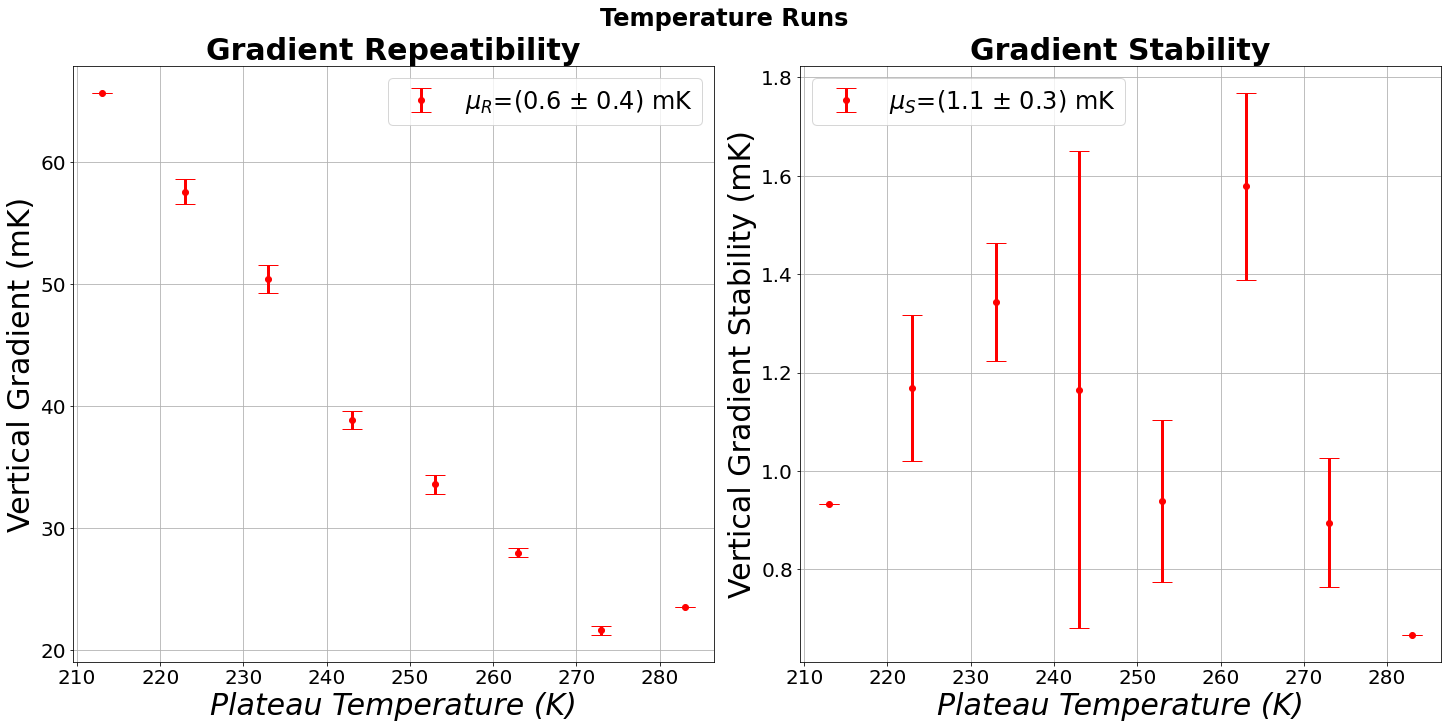

In [36]:
tdates = ["20230224"]

fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Temperature Runs", fontweight="bold")
fig.set_size_inches((20,10))
sens = "T1"
ref = "T2"
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
TEMPS, HUMS = {}, {}
TEMPS_ERR, HUMS_ERR = {}, {}
for key in plateaus["20230224"].keys():
    if "293" in key:
        continue
    if str(key.split("_")[1]) == "up":
        continue
    TEMPS[str(key.split("_")[0])] = []
    HUMS[str(key.split("_")[0])] = []
    TEMPS_ERR[str(key.split("_")[0])] = []
    HUMS_ERR[str(key.split("_")[0])] = []

for date in tdates:
    print(date)
    if "202302" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
    if "202303" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                            filetype="temperature",
                                            pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        temp = plateau.split("_")[0]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
        if len(tcut) < 1000:
            continue
        if (np.std((int(temp) - tcut[sens]).values)) > 1e-1:
            continue
        cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
        TEMPS[temp].append(np.mean(tcut[sens] - tcut[ref] - cc))
        TEMPS_ERR[temp].append(np.std(tcut[sens] - tcut[ref] - cc))

accuracies, accuracies_err = [], []
accuracies_stab, accuracies_stab_err = [], []
temperatures = []
for temp in TEMPS.keys():
    temperatures.append(int(temp))
    accuracies.append(np.mean(TEMPS[temp]))
    accuracies_err.append(np.std(TEMPS[temp]))
    accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
    accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

axes[0].errorbar(temperatures, 1e3*np.array(accuracies), fmt="o", capsize=10,
                      yerr=1e3*np.array(accuracies_err), color="red",
                label=r"$\mu_R$=({0:.1f} $\pm$ {1:.1f}) mK".format(1e3*np.mean(accuracies_err),
                                                                   1e3*np.std(accuracies_err)))
axes[1].errorbar(temperatures, 1e3*np.array(accuracies_stab), fmt="o", capsize=10,
                      yerr=1e3*np.array(accuracies_stab_err), color="red",
                label=r"$\mu_S$=({0:.1f} $\pm$ {1:.1f}) mK".format(1e3*np.mean(accuracies_stab),
                                                                   1e3*np.std(accuracies_stab)))
axes[0].legend()
axes[1].legend()
axes[0].set_title("Gradient Repeatibility", fontsize=30, fontweight="bold")
axes[0].set_ylabel("Vertical Gradient (mK)", fontsize=30)
axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
axes[1].set_title("Gradient Stability", fontsize=30, fontweight="bold")
axes[1].set_ylabel("Vertical Gradient Stability (mK)", fontsize=30)
axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 14.96it/s]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 17.39it/s]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 37.67it/s]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 14.05it/s]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 19.81it/s]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 26.41it/s]


Text(0.5, 0, 'Temperature Plateau (K)')

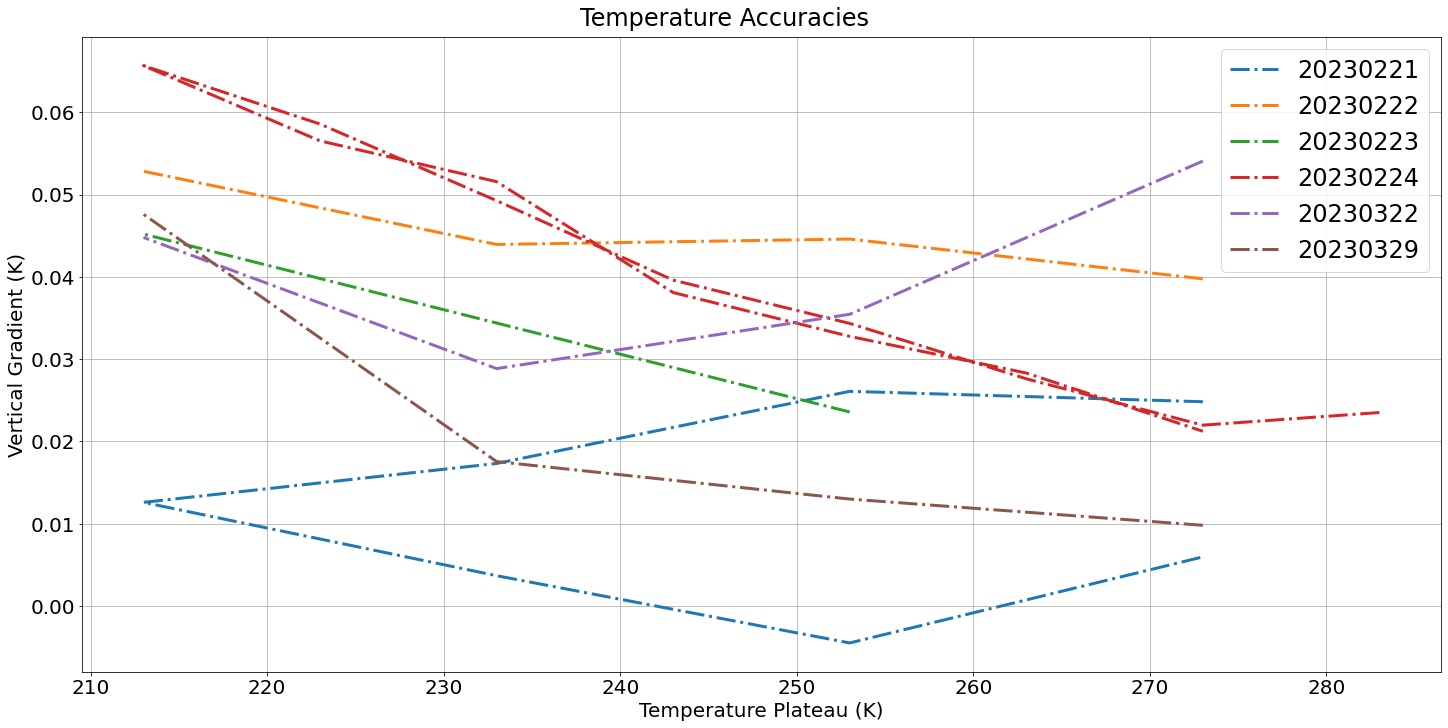

In [14]:
fig, axes = graphic_tools.make_figure(ncols=1, nrows=1)
fig.set_size_inches(20, 10)
fig.suptitle("Temperature Accuracies")
accuracy = {}
temps = {}
acc_res = {}
acc_err = {}
temp_res = {}
for plateau in plateaus["20230224"].keys():
    if plateau.split("_")[0] == "293":
        continue
    accuracy[plateau.split("_")[0]] = []
    temps[plateau.split("_")[0]] = []
sens = "T1"
ref="T2"
for date in ["20230221", "20230222", "20230223", "20230224", "20230322", "20230329"]:
    if "03" in date:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
    else:
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    temperature, temps_err = [], []
    accuracies, accuracies_err = [], []
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0] + tau
        tf = plateaus[date][plateau][1]
        cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
        tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
        objT = int(plateau.split("_")[0])
        obsT = tcut[sens]-tcut[ref]-cc
        # obsT = objT-tcut[sens]
        temperature.append(objT)
        #temps_err.append(np.std(ccut["T"]))
        accuracies.append(np.mean(obsT))
        accuracies_err.append(np.std(objT-obsT))
        if plateau.split("_")[0] == "293":
            continue
        accuracy[plateau.split("_")[0]].append(np.mean(obsT))
        temps[plateau.split("_")[0]].append(objT)
    axes.plot(
        temperature,
        accuracies,
        "-.",
        label=date
    )

for plateau in accuracy.keys():
    acc_res[plateau] = np.mean(accuracy[plateau])
    acc_err[plateau] = np.std(accuracy[plateau])
    temp_res[plateau] = np.mean(temps[plateau])

mean = np.mean(list(acc_res.values()))
sigma = np.std(list(acc_res.values()))
# axes.errorbar(
#     temp_res.values(),
#     acc_res.values(),
#     yerr=acc_err.values(),
#     fmt="o",
#     label=r"$\mu$={0:.0f}mK, $\sigma$={1:.0f}mK".format(mean*1e3,sigma*1e3),
#     capsize=20
# )
axes.legend()
# axes.set_ylabel(r"(Obj. T - Measured T by {0}) (K)".format(sens))
axes.set_ylabel(r"Vertical Gradient (K)")
axes.set_xlabel("Temperature Plateau (K)")

# FBGs characterisation

## Wavelength Reproducibility and Stability

The exact same procedure as for the RTDs and climatic chamber to calculate stability and reproducibility.

The time cuts are applied according to the $\tau$ value previously presented.

20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [01:41<00:00,  4.41s/it]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [02:27<00:00,  6.41s/it]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:43<00:00,  3.11s/it]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [20:52<00:00, 19.88s/it]


20230321
Keys to read: ['10Av1', '11Av1', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av1', '5Av2', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 16/16 [00:52<00:00,  3.26s/it]


20230322
Keys to read: ['10Av3', '1Av1', '1Av2', '1Av3', '1Av4', '2Av1', '2Av3', '2Av4', '3Av1', '3Av3', '3Av4', '4Av1', '4Av3', '4Av4', '5Av3', '5Av4', '6Av3', '7Av3', '8Av3', '9Av3']


Reading peaks key: Av: 100%|██████████| 20/20 [01:12<00:00,  3.61s/it]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:50<00:00,  2.80s/it]


Text(0.5, 0, 'Plateau Temperature (K)')

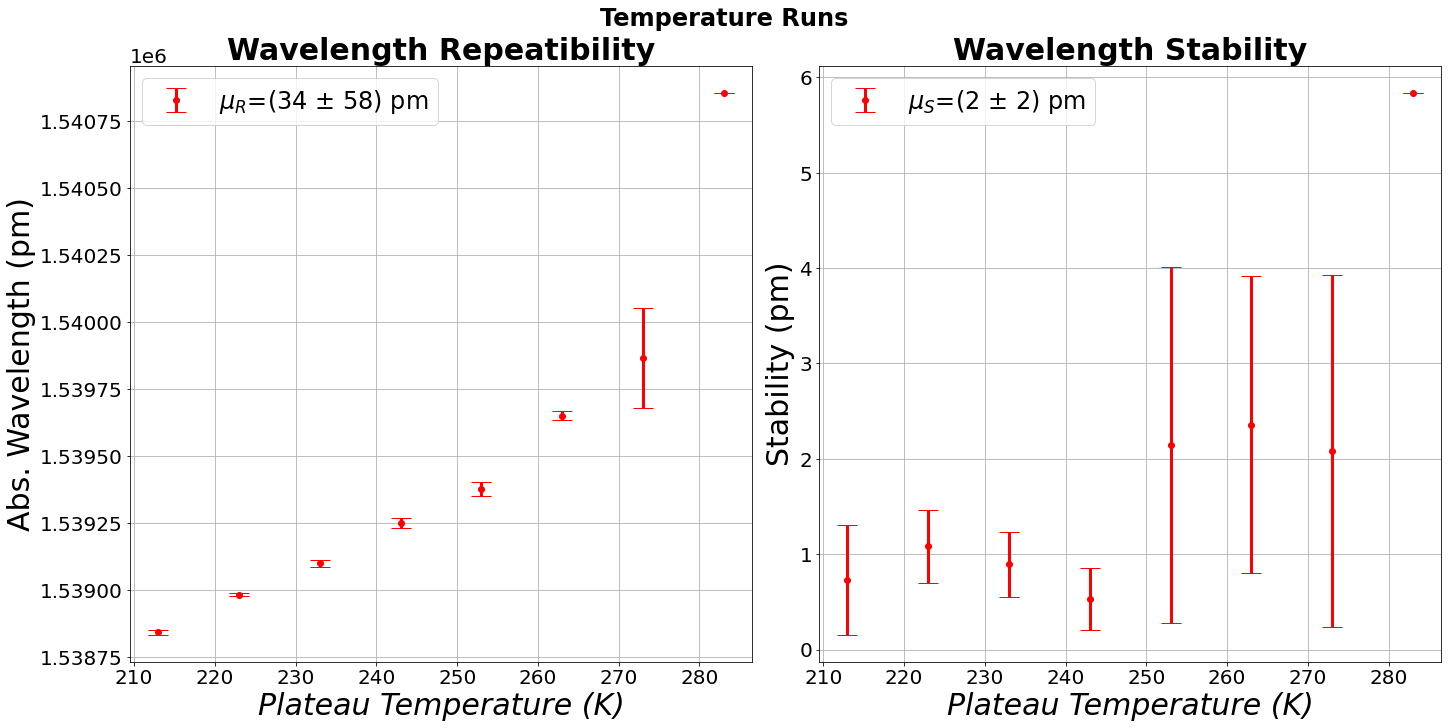

In [15]:
tdates = ["20230221", "20230222", "20230223", "20230224", "20230321", "20230322", "20230329"]

fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Temperature Runs", fontweight="bold")
fig.set_size_inches((20,10))
sens = ["Wav1-1"]
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
TEMPS, HUMS = {}, {}
TEMPS_ERR, HUMS_ERR = {}, {}
for key in plateaus["20230224"].keys():
    if "293" in key:
        continue
    if str(key.split("_")[1]) == "up":
        continue
    TEMPS[str(key.split("_")[0])] = []
    HUMS[str(key.split("_")[0])] = []
    TEMPS_ERR[str(key.split("_")[0])] = []
    HUMS_ERR[str(key.split("_")[0])] = []

for date in tdates:
    print(date)
    if "202302" in date:
        sens="Wav2-1"
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
    if "202303" in date:
        sens="Wav1-1"
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                            filetype="peaks",
                                            pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        temp = plateau.split("_")[0]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
        if len(tcut) < 1000:
            continue
        TEMPS[temp].append(np.mean((tcut[sens]).values))
        TEMPS_ERR[temp].append(np.std((tcut[sens]).values))

accuracies, accuracies_err = [], []
accuracies_stab, accuracies_stab_err = [], []
temperatures = []
for temp in TEMPS.keys():
    temperatures.append(int(temp))
    accuracies.append(np.mean(TEMPS[temp]))
    accuracies_err.append(np.std(TEMPS[temp]))
    accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
    accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

axes[0].errorbar(temperatures, 1e12*np.array(accuracies), fmt="o", capsize=10,
                      yerr=1e12*np.array(accuracies_err), color="red",
                label=r"$\mu_R$=({0:.0f} $\pm$ {1:.0f}) pm".format(1e12*np.mean(accuracies_err),
                                                                   1e12*np.std(accuracies_err)))
axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                      yerr=1e12*np.array(accuracies_stab_err), color="red",
                label=r"$\mu_S$=({0:.0f} $\pm$ {1:.0f}) pm".format(1e12*np.mean(accuracies_stab),
                                                                   1e12*np.std(accuracies_stab)))
axes[0].legend()
axes[1].legend()
axes[0].set_title("Wavelength Repeatibility", fontsize=30, fontweight="bold")
axes[0].set_ylabel("Abs. Wavelength (pm)", fontsize=30)
axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
axes[1].set_title("Wavelength Stability", fontsize=30, fontweight="bold")
axes[1].set_ylabel("Stability (pm)", fontsize=30)
axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:12<00:00,  1.91it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.14it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:09<00:00,  1.10s/it]


20230321
Keys to read: ['10Av1', '11Av1', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av1', '5Av2', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 16/16 [00:02<00:00,  6.55it/s]


20230322
Keys to read: ['10Av3', '1Av1', '1Av2', '1Av3', '1Av4', '2Av1', '2Av3', '2Av4', '3Av1', '3Av3', '3Av4', '4Av1', '4Av3', '4Av4', '5Av3', '5Av4', '6Av3', '7Av3', '8Av3', '9Av3']


Reading peaks key: Av: 100%|██████████| 20/20 [00:03<00:00,  5.37it/s]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:06<00:00,  2.94it/s]


20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.10it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.24it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.23it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:08<00:00,  1.09s/it]


20230321
Keys to read: ['10Av1', '11Av1', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av1', '5Av2', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 16/16 [00:02<00:00,  5.80it/s]


20230322
Keys to read: ['10Av3', '1Av1', '1Av2', '1Av3', '1Av4', '2Av1', '2Av3', '2Av4', '3Av1', '3Av3', '3Av4', '4Av1', '4Av3', '4Av4', '5Av3', '5Av4', '6Av3', '7Av3', '8Av3', '9Av3']


Reading peaks key: Av: 100%|██████████| 20/20 [00:03<00:00,  5.31it/s]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:06<00:00,  2.86it/s]


20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  1.99it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.17it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.18it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:10<00:00,  1.12s/it]


20230321
Keys to read: ['10Av1', '11Av1', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av1', '5Av2', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 16/16 [00:02<00:00,  6.33it/s]


20230322
Keys to read: ['10Av3', '1Av1', '1Av2', '1Av3', '1Av4', '2Av1', '2Av3', '2Av4', '3Av1', '3Av3', '3Av4', '4Av1', '4Av3', '4Av4', '5Av3', '5Av4', '6Av3', '7Av3', '8Av3', '9Av3']


Reading peaks key: Av: 100%|██████████| 20/20 [00:03<00:00,  5.26it/s]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:05<00:00,  3.08it/s]


20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.09it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.19it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:09<00:00,  1.10s/it]


20230321
Keys to read: ['10Av1', '11Av1', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av1', '5Av2', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


20230322
Keys to read: ['10Av3', '1Av1', '1Av2', '1Av3', '1Av4', '2Av1', '2Av3', '2Av4', '3Av1', '3Av3', '3Av4', '4Av1', '4Av3', '4Av4', '5Av3', '5Av4', '6Av3', '7Av3', '8Av3', '9Av3']


Reading peaks key: Av: 100%|██████████| 20/20 [00:04<00:00,  4.97it/s]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:06<00:00,  2.85it/s]


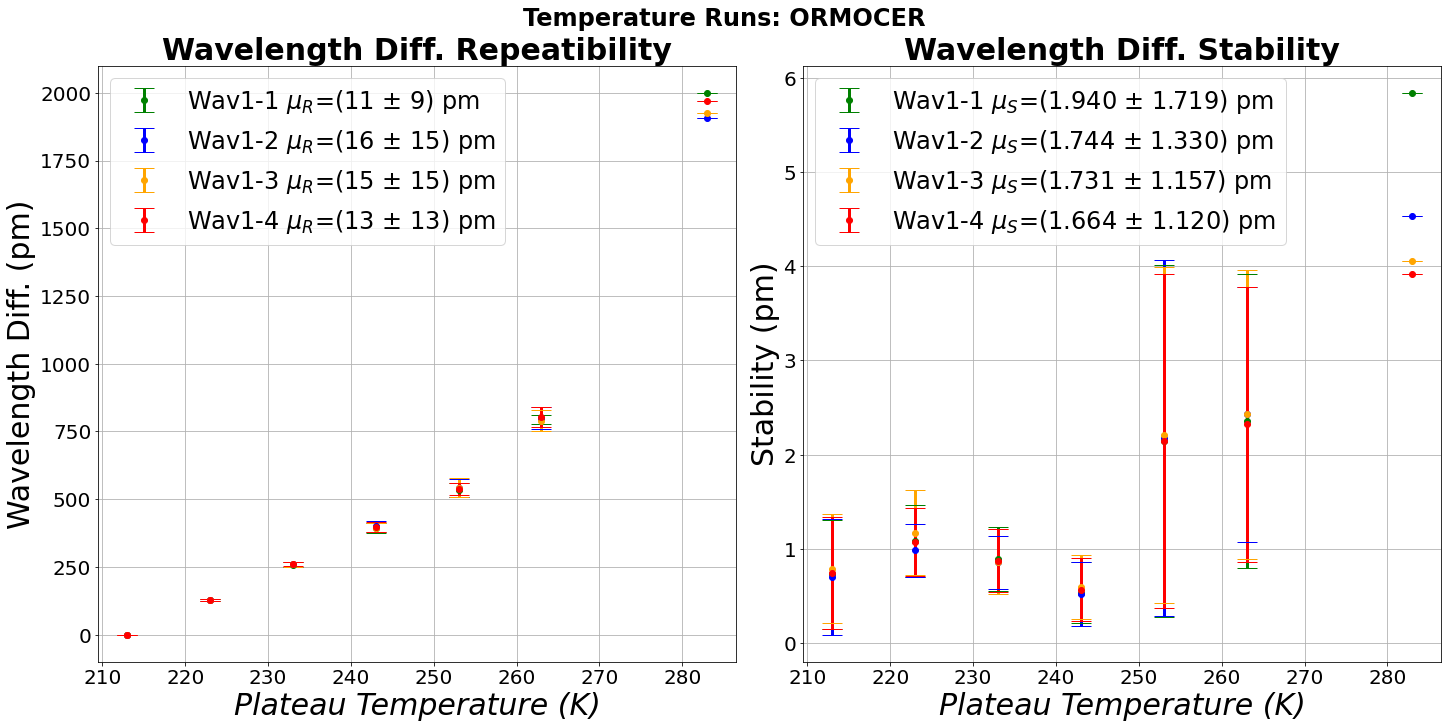

In [26]:
tdates = ["20230221", "20230222", "20230223", "20230224", "20230321", "20230322", "20230329"]
colors = {"1":"green", "2":"blue", "3":"orange", "4":"red"}
off_teo = {"1":0, "2":5000, "3":10000, "4":15000}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Temperature Runs: ORMOCER", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
for nsens in ["1", "2", "3", "4"]:
    TEMPS, HUMS = {}, {}
    TEMPS_ERR, HUMS_ERR = {}, {}
    for key in plateaus["20230224"].keys():
        if "293" in key:
            continue
        if "273" in key:
            continue
        if str(key.split("_")[1]) == "up":
            continue
        TEMPS[str(key.split("_")[0])] = []
        HUMS[str(key.split("_")[0])] = []
        TEMPS_ERR[str(key.split("_")[0])] = []
        HUMS_ERR[str(key.split("_")[0])] = []

    for date in tdates:
        print(date)
        if "202302" in date:
            sens="Wav2-"+nsens
            ref="Wav2-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
        if "202303" in date:
            sens="Wav1-"+nsens
            ref="Wav1-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
        climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                                filetype="peaks",
                                                pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        t0 = plateaus[date]["213_down"][0]
        tf = plateaus[date]["213_down"][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
        ref_val = np.mean((tcut[sens]).values)
        for plateau in plateaus[date]:
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            temp = plateau.split("_")[0]
            tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
            if len(tcut) < 1000:
                continue
            if temp == "273":
                continue
            TEMPS[temp].append(np.mean((tcut[sens]-ref_val).values))
            TEMPS_ERR[temp].append(np.std((tcut[sens]-ref_val).values))

    accuracies, accuracies_err = [], []
    accuracies_stab, accuracies_stab_err = [], []
    temperatures = []
    for temp in TEMPS.keys():
        temperatures.append(int(temp))
        accuracies.append(np.mean(TEMPS[temp]))
        accuracies_err.append(np.std(TEMPS[temp]))
        accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
        accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

    axes[0].errorbar(temperatures, 1e12*np.array(accuracies), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_err), color=colors[nsens],
                    label=r"Wav1-{0} $\mu_R$=({1:.0f} $\pm$ {2:.0f}) pm".format(nsens, 1e12*np.mean(accuracies_err),
                                                                       1e12*np.std(accuracies_err)))
    axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_stab_err), color=colors[nsens],
                    label=r"Wav1-{0} $\mu_S$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens, 1e12*np.mean(accuracies_stab),
                                                                       1e12*np.std(accuracies_stab)))
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("Wavelength Diff. Repeatibility", fontsize=30, fontweight="bold")
    axes[0].set_ylabel("Wavelength Diff. (pm)", fontsize=30)
    axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
    axes[1].set_title("Wavelength Diff. Stability", fontsize=30, fontweight="bold")
    axes[1].set_ylabel("Stability (pm)", fontsize=30)
    axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  2.05it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.14it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:09<00:00,  1.10s/it]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:05<00:00,  3.09it/s]


20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  2.06it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.12it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:16<00:00,  1.21s/it]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:05<00:00,  3.04it/s]


20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  1.97it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.16it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:10<00:00,  1.12s/it]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:06<00:00,  2.81it/s]


20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:12<00:00,  1.86it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.13it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.13it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:11<00:00,  1.13s/it]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:06<00:00,  2.88it/s]


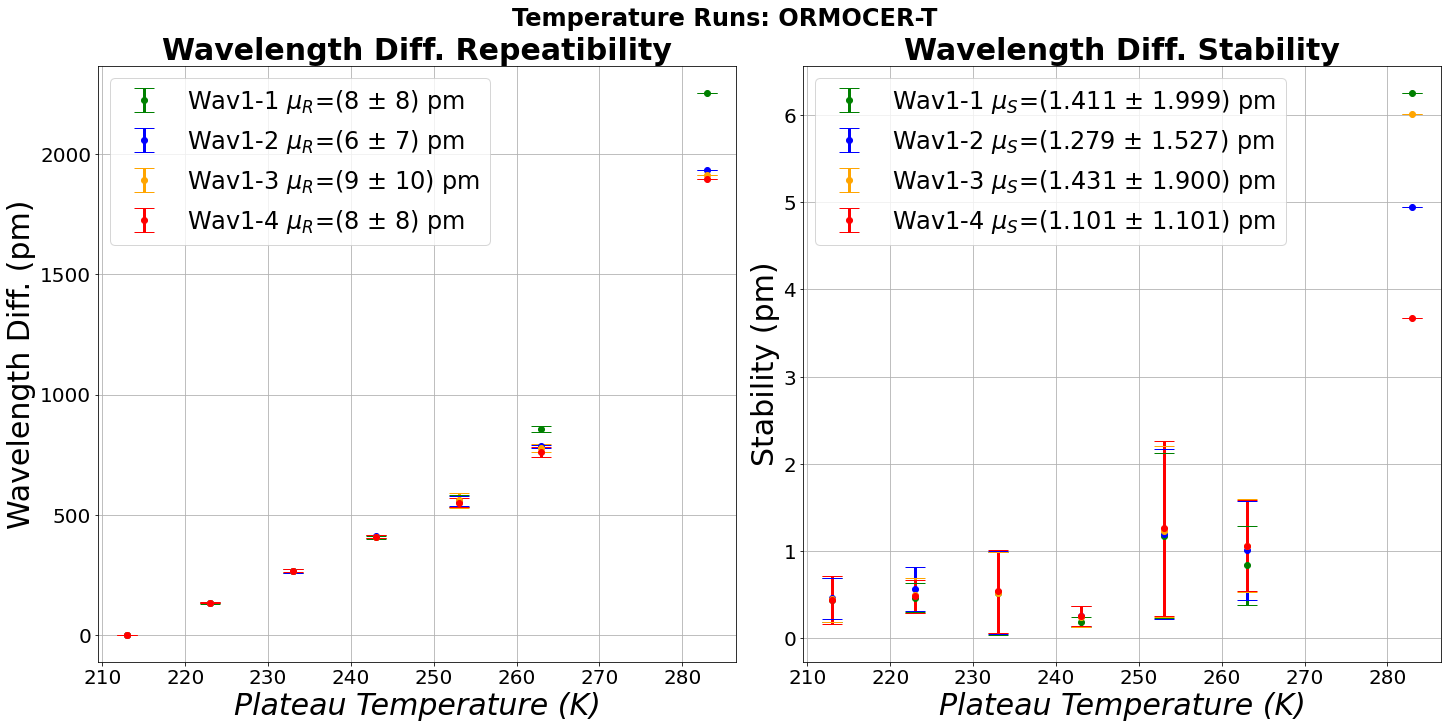

In [27]:
tdates = ["20230221", "20230222", "20230223", "20230224", "20230329"]
colors = {"1":"green", "2":"blue", "3":"orange", "4":"red"}
off_teo = {"1":0, "2":5000, "3":10000, "4":15000}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Temperature Runs: ORMOCER-T", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
for nsens in ["1", "2", "3", "4"]:
    TEMPS, HUMS = {}, {}
    TEMPS_ERR, HUMS_ERR = {}, {}
    for key in plateaus["20230224"].keys():
        if "293" in key:
            continue
        if "273" in key:
            continue
        if str(key.split("_")[1]) == "up":
            continue
        TEMPS[str(key.split("_")[0])] = []
        HUMS[str(key.split("_")[0])] = []
        TEMPS_ERR[str(key.split("_")[0])] = []
        HUMS_ERR[str(key.split("_")[0])] = []

    for date in tdates:
        print(date)
        if "202302" in date:
            sens="Wav1-"+nsens
            ref="Wav1-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
        if "202303" in date:
            sens="Wav2-"+nsens
            ref="Wav2-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
        climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                                filetype="peaks",
                                                pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        t0 = plateaus[date]["213_down"][0]
        tf = plateaus[date]["213_down"][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
        ref_val = np.mean((tcut[sens]).values)
        for plateau in plateaus[date]:
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            temp = plateau.split("_")[0]
            tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
            if len(tcut) < 1000:
                continue
            if temp == "273":
                continue
            TEMPS[temp].append(np.mean((tcut[sens]-ref_val).values))
            TEMPS_ERR[temp].append(np.std((tcut[sens]-ref_val).values))

    accuracies, accuracies_err = [], []
    accuracies_stab, accuracies_stab_err = [], []
    temperatures = []
    for temp in TEMPS.keys():
        temperatures.append(int(temp))
        accuracies.append(np.mean(TEMPS[temp]))
        accuracies_err.append(np.std(TEMPS[temp]))
        accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
        accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

    axes[0].errorbar(temperatures, 1e12*np.array(accuracies), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_err), color=colors[nsens],
                    label=r"Wav1-{0} $\mu_R$=({1:.0f} $\pm$ {2:.0f}) pm".format(nsens, 1e12*np.mean(accuracies_err),
                                                                       1e12*np.std(accuracies_err)))
    axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_stab_err), color=colors[nsens],
                    label=r"Wav1-{0} $\mu_S$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens, 1e12*np.mean(accuracies_stab),
                                                                       1e12*np.std(accuracies_stab)))
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("Wavelength Diff. Repeatibility", fontsize=30, fontweight="bold")
    axes[0].set_ylabel("Wavelength Diff. (pm)", fontsize=30)
    axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
    axes[1].set_title("Wavelength Diff. Stability", fontsize=30, fontweight="bold")
    axes[1].set_ylabel("Stability (pm)", fontsize=30)
    axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  1.97it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.20it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.25it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:12<00:00,  1.16s/it]


20230321
Keys to read: ['10Av1', '11Av1', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av1', '5Av2', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 16/16 [00:02<00:00,  6.00it/s]


20230322
Keys to read: ['10Av3', '1Av1', '1Av2', '1Av3', '1Av4', '2Av1', '2Av3', '2Av4', '3Av1', '3Av3', '3Av4', '4Av1', '4Av3', '4Av4', '5Av3', '5Av4', '6Av3', '7Av3', '8Av3', '9Av3']


Reading peaks key: Av: 100%|██████████| 20/20 [00:04<00:00,  4.91it/s]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:06<00:00,  2.99it/s]


Text(0.5, 0, 'Plateau Temperature (K)')

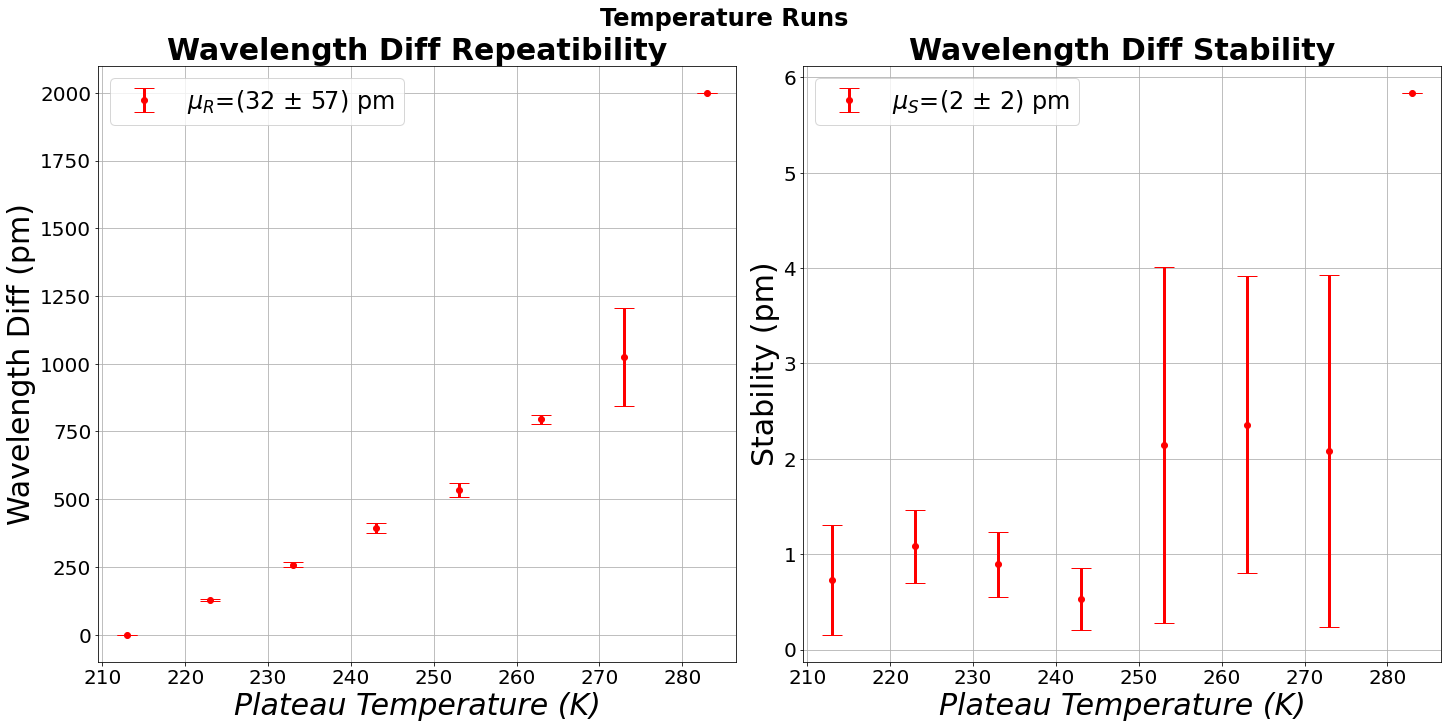

In [28]:
tdates = ["20230221", "20230222", "20230223", "20230224", "20230321", "20230322", "20230329"]

fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Temperature Runs", fontweight="bold")
fig.set_size_inches((20,10))
sens = ["Wav1-1"]
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
TEMPS, HUMS = {}, {}
TEMPS_ERR, HUMS_ERR = {}, {}
for key in plateaus["20230224"].keys():
    if "293" in key:
        continue
    if str(key.split("_")[1]) == "up":
        continue
    TEMPS[str(key.split("_")[0])] = []
    HUMS[str(key.split("_")[0])] = []
    TEMPS_ERR[str(key.split("_")[0])] = []
    HUMS_ERR[str(key.split("_")[0])] = []

for date in tdates:
    print(date)
    if "202302" in date:
        sens="Wav2-1"
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
    if "202303" in date:
        sens="Wav1-1"
        path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                            filetype="peaks",
                                            pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    t0 = plateaus[date]["213_down"][0]
    tf = plateaus[date]["213_down"][1]
    tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
    ref_val = np.mean((tcut[sens]).values)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        temp = plateau.split("_")[0]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
        if len(tcut) < 1000:
            continue
        TEMPS[temp].append(np.mean((tcut[sens]-ref_val).values))
        TEMPS_ERR[temp].append(np.std((tcut[sens]).values))

accuracies, accuracies_err = [], []
accuracies_stab, accuracies_stab_err = [], []
temperatures = []
for temp in TEMPS.keys():
    temperatures.append(int(temp))
    accuracies.append(np.mean(TEMPS[temp]))
    accuracies_err.append(np.std(TEMPS[temp]))
    accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
    accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

axes[0].errorbar(temperatures, 1e12*np.array(accuracies), fmt="o", capsize=10,
                      yerr=1e12*np.array(accuracies_err), color="red",
                label=r"$\mu_R$=({0:.0f} $\pm$ {1:.0f}) pm".format(1e12*np.mean(accuracies_err),
                                                                   1e12*np.std(accuracies_err)))
axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                      yerr=1e12*np.array(accuracies_stab_err), color="red",
                label=r"$\mu_S$=({0:.0f} $\pm$ {1:.0f}) pm".format(1e12*np.mean(accuracies_stab),
                                                                   1e12*np.std(accuracies_stab)))
axes[0].legend()
axes[1].legend()
axes[0].set_title("Wavelength Diff Repeatibility", fontsize=30, fontweight="bold")
axes[0].set_ylabel("Wavelength Diff (pm)", fontsize=30)
axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
axes[1].set_title("Wavelength Diff Stability", fontsize=30, fontweight="bold")
axes[1].set_ylabel("Stability (pm)", fontsize=30)
axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:12<00:00,  1.88it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.20it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.16it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:14<00:00,  1.18s/it]


20230321
Keys to read: ['10Av1', '11Av1', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av1', '5Av2', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 16/16 [00:03<00:00,  5.14it/s]


20230322
Keys to read: ['10Av3', '1Av1', '1Av2', '1Av3', '1Av4', '2Av1', '2Av3', '2Av4', '3Av1', '3Av3', '3Av4', '4Av1', '4Av3', '4Av4', '5Av3', '5Av4', '6Av3', '7Av3', '8Av3', '9Av3']


Reading peaks key: Av: 100%|██████████| 20/20 [00:04<00:00,  4.29it/s]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:06<00:00,  2.87it/s]


20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.09it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.18it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  2.99it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:14<00:00,  1.18s/it]


20230321
Keys to read: ['10Av1', '11Av1', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av1', '5Av2', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 16/16 [00:02<00:00,  6.41it/s]


20230322
Keys to read: ['10Av3', '1Av1', '1Av2', '1Av3', '1Av4', '2Av1', '2Av3', '2Av4', '3Av1', '3Av3', '3Av4', '4Av1', '4Av3', '4Av4', '5Av3', '5Av4', '6Av3', '7Av3', '8Av3', '9Av3']


Reading peaks key: Av: 100%|██████████| 20/20 [00:04<00:00,  4.81it/s]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:06<00:00,  2.73it/s]


20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  2.07it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.15it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.03it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:19<00:00,  1.27s/it]


20230321
Keys to read: ['10Av1', '11Av1', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av1', '5Av2', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 16/16 [00:02<00:00,  6.29it/s]


20230322
Keys to read: ['10Av3', '1Av1', '1Av2', '1Av3', '1Av4', '2Av1', '2Av3', '2Av4', '3Av1', '3Av3', '3Av4', '4Av1', '4Av3', '4Av4', '5Av3', '5Av4', '6Av3', '7Av3', '8Av3', '9Av3']


Reading peaks key: Av: 100%|██████████| 20/20 [00:03<00:00,  5.43it/s]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:06<00:00,  2.92it/s]


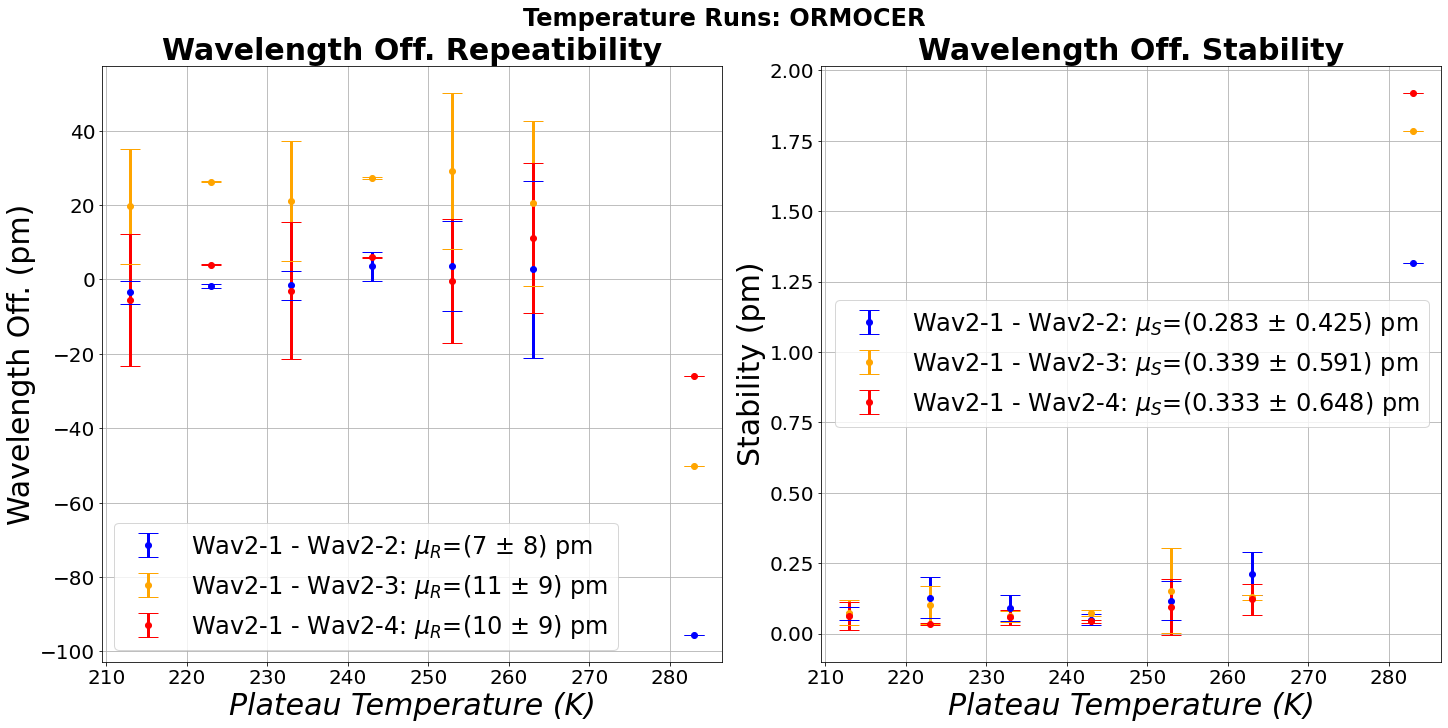

In [36]:
tdates = ["20230221", "20230222", "20230223", "20230224", "20230321", "20230322", "20230329"]
colors = {"2":"blue", "3":"orange", "4":"red"}
off_teo = {"2":5000, "3":10000, "4":15000}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Temperature Runs: ORMOCER", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
for nsens in ["2", "3", "4"]:
    TEMPS, HUMS = {}, {}
    TEMPS_ERR, HUMS_ERR = {}, {}
    for key in plateaus["20230224"].keys():
        if "293" in key:
            continue
        if "273" in key:
            continue
        if str(key.split("_")[1]) == "up":
            continue
        TEMPS[str(key.split("_")[0])] = []
        HUMS[str(key.split("_")[0])] = []
        TEMPS_ERR[str(key.split("_")[0])] = []
        HUMS_ERR[str(key.split("_")[0])] = []

    for date in tdates:
        print(date)
        if "202302" in date:
            sens="Wav2-"+nsens
            ref="Wav2-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
        if "202303" in date:
            sens="Wav1-"+nsens
            ref="Wav1-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
        climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                                filetype="peaks",
                                                pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        for plateau in plateaus[date]:
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            temp = plateau.split("_")[0]
            tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
            if len(tcut) < 1000:
                continue
            if temp == "273":
                continue
            TEMPS[temp].append(np.mean((tcut[sens]-tcut[ref]).values))
            TEMPS_ERR[temp].append(np.std((tcut[sens]-tcut[ref]).values))

    accuracies, accuracies_err = [], []
    accuracies_stab, accuracies_stab_err = [], []
    temperatures = []
    for temp in TEMPS.keys():
        temperatures.append(int(temp))
        accuracies.append(np.mean(TEMPS[temp]))
        accuracies_err.append(np.std(TEMPS[temp]))
        accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
        accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

    axes[0].errorbar(temperatures, 1e12*np.array(accuracies)-off_teo[nsens], fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_err), color=colors[nsens],
                    label=r"Wav2-1 - Wav2-{0}: $\mu_R$=({1:.0f} $\pm$ {2:.0f}) pm".format(nsens,
                                                                        1e12*np.mean(accuracies_err),
                                                                       1e12*np.std(accuracies_err)))
    axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_stab_err), color=colors[nsens],
                    label=r"Wav2-1 - Wav2-{0}: $\mu_S$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens,
                                                                        1e12*np.mean(accuracies_stab),
                                                                       1e12*np.std(accuracies_stab)))
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("Wavelength Off. Repeatibility", fontsize=30, fontweight="bold")
    axes[0].set_ylabel("Wavelength Off. (pm)", fontsize=30)
    axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
    axes[1].set_title("Wavelength Off. Stability", fontsize=30, fontweight="bold")
    axes[1].set_ylabel("Stability (pm)", fontsize=30)
    axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:14<00:00,  1.64it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  2.08it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.26it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:18<00:00,  1.24s/it]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:06<00:00,  2.67it/s]


20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  2.00it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.16it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:14<00:00,  1.19s/it]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:06<00:00,  2.85it/s]


20230221
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.10it/s]


20230222
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.27it/s]


20230223
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.20it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:14<00:00,  1.19s/it]


20230329
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:05<00:00,  3.03it/s]


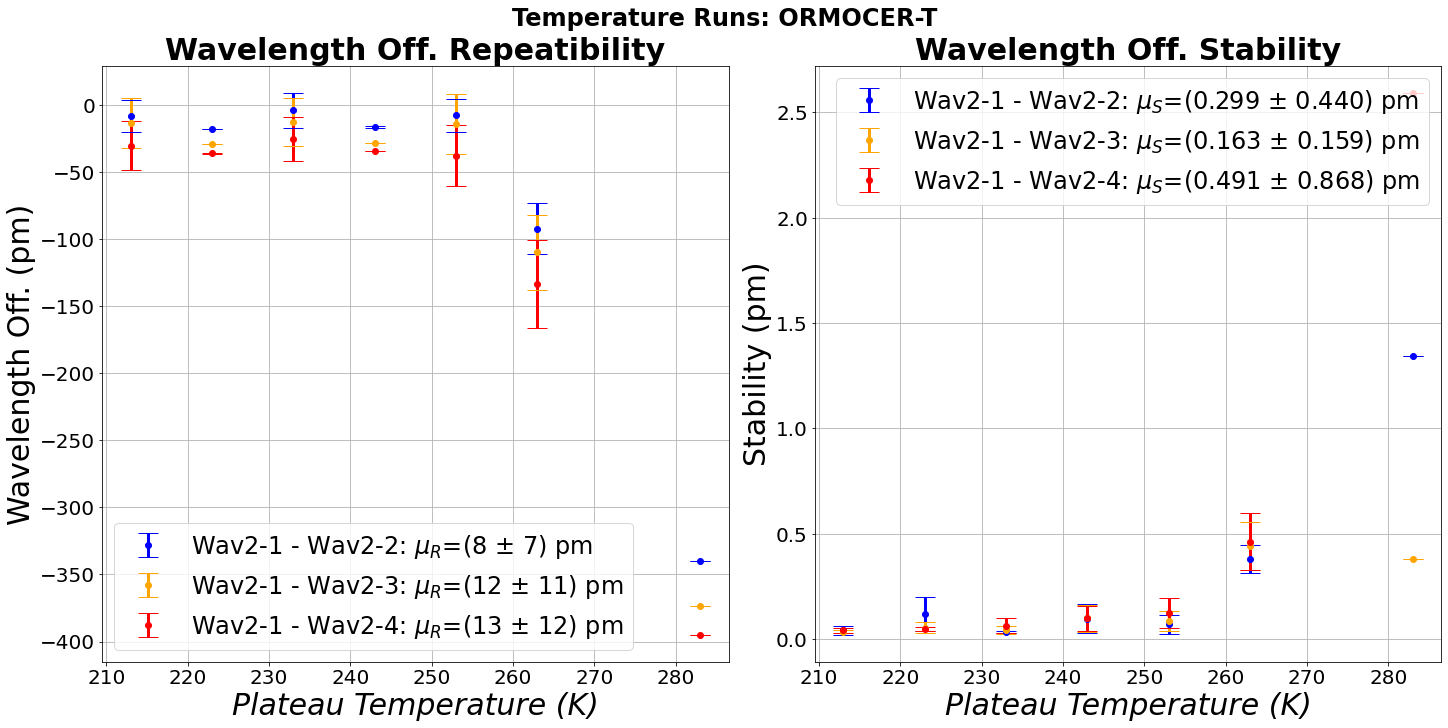

In [37]:
tdates = ["20230221", "20230222", "20230223", "20230224", "20230329"]
colors = {"2":"blue", "3":"orange", "4":"red"}
off_teo = {"2":5000, "3":10000, "4":15000}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Temperature Runs: ORMOCER-T", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
for nsens in ["2", "3", "4"]:
    TEMPS, HUMS = {}, {}
    TEMPS_ERR, HUMS_ERR = {}, {}
    for key in plateaus["20230224"].keys():
        if "293" in key:
            continue
        if "273" in key:
            continue
        if str(key.split("_")[1]) == "up":
            continue
        TEMPS[str(key.split("_")[0])] = []
        HUMS[str(key.split("_")[0])] = []
        TEMPS_ERR[str(key.split("_")[0])] = []
        HUMS_ERR[str(key.split("_")[0])] = []

    for date in tdates:
        print(date)
        if "202302" in date:
            sens="Wav1-"+nsens
            ref="Wav1-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
        if "202303" in date:
            sens="Wav2-"+nsens
            ref="Wav2-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
        climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                                filetype="peaks",
                                                pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        for plateau in plateaus[date]:
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            temp = plateau.split("_")[0]
            tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
            if len(tcut) < 1000:
                continue
            if temp == "273":
                continue
            TEMPS[temp].append(np.mean((tcut[sens]-tcut[ref]).values))
            TEMPS_ERR[temp].append(np.std((tcut[sens]-tcut[ref]).values))

    accuracies, accuracies_err = [], []
    accuracies_stab, accuracies_stab_err = [], []
    temperatures = []
    for temp in TEMPS.keys():
        temperatures.append(int(temp))
        accuracies.append(np.mean(TEMPS[temp]))
        accuracies_err.append(np.std(TEMPS[temp]))
        accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
        accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

    axes[0].errorbar(temperatures, 1e12*np.array(accuracies)-off_teo[nsens], fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_err), color=colors[nsens],
                    label=r"Wav2-1 - Wav2-{0}: $\mu_R$=({1:.0f} $\pm$ {2:.0f}) pm".format(nsens,
                                                                        1e12*np.mean(accuracies_err),
                                                                       1e12*np.std(accuracies_err)))
    axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_stab_err), color=colors[nsens],
                    label=r"Wav2-1 - Wav2-{0}: $\mu_S$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens,
                                                                        1e12*np.mean(accuracies_stab),
                                                                       1e12*np.std(accuracies_stab)))
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("Wavelength Off. Repeatibility", fontsize=30, fontweight="bold")
    axes[0].set_ylabel("Wavelength Off. (pm)", fontsize=30)
    axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
    axes[1].set_title("Wavelength Off. Stability", fontsize=30, fontweight="bold")
    axes[1].set_ylabel("Stability (pm)", fontsize=30)
    axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

20230323
Keys to read: ['10Av0', '11Av0', '12Av0', '13Av0', '14Av0', '15Av0', '16Av0', '17Av0', '1Av0', '2Av0', '3Av0', '4Av0', '5Av0', '6Av0', '7Av0', '8Av0', '9Av0']


Reading peaks key: Av: 100%|██████████| 17/17 [00:02<00:00,  7.48it/s]


20230327
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:03<00:00,  6.66it/s]


20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:03<00:00,  5.04it/s]


20230323
Keys to read: ['10Av0', '11Av0', '12Av0', '13Av0', '14Av0', '15Av0', '16Av0', '17Av0', '1Av0', '2Av0', '3Av0', '4Av0', '5Av0', '6Av0', '7Av0', '8Av0', '9Av0']


Reading peaks key: Av: 100%|██████████| 17/17 [00:01<00:00,  8.54it/s]


20230327
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:03<00:00,  7.50it/s]


20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:03<00:00,  5.40it/s]


20230323
Keys to read: ['10Av0', '11Av0', '12Av0', '13Av0', '14Av0', '15Av0', '16Av0', '17Av0', '1Av0', '2Av0', '3Av0', '4Av0', '5Av0', '6Av0', '7Av0', '8Av0', '9Av0']


Reading peaks key: Av: 100%|██████████| 17/17 [00:01<00:00,  8.91it/s]


20230327
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:03<00:00,  7.52it/s]


20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:03<00:00,  5.25it/s]


20230323
Keys to read: ['10Av0', '11Av0', '12Av0', '13Av0', '14Av0', '15Av0', '16Av0', '17Av0', '1Av0', '2Av0', '3Av0', '4Av0', '5Av0', '6Av0', '7Av0', '8Av0', '9Av0']


Reading peaks key: Av: 100%|██████████| 17/17 [00:02<00:00,  7.86it/s]


20230327
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:03<00:00,  7.55it/s]


20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:04<00:00,  4.14it/s]


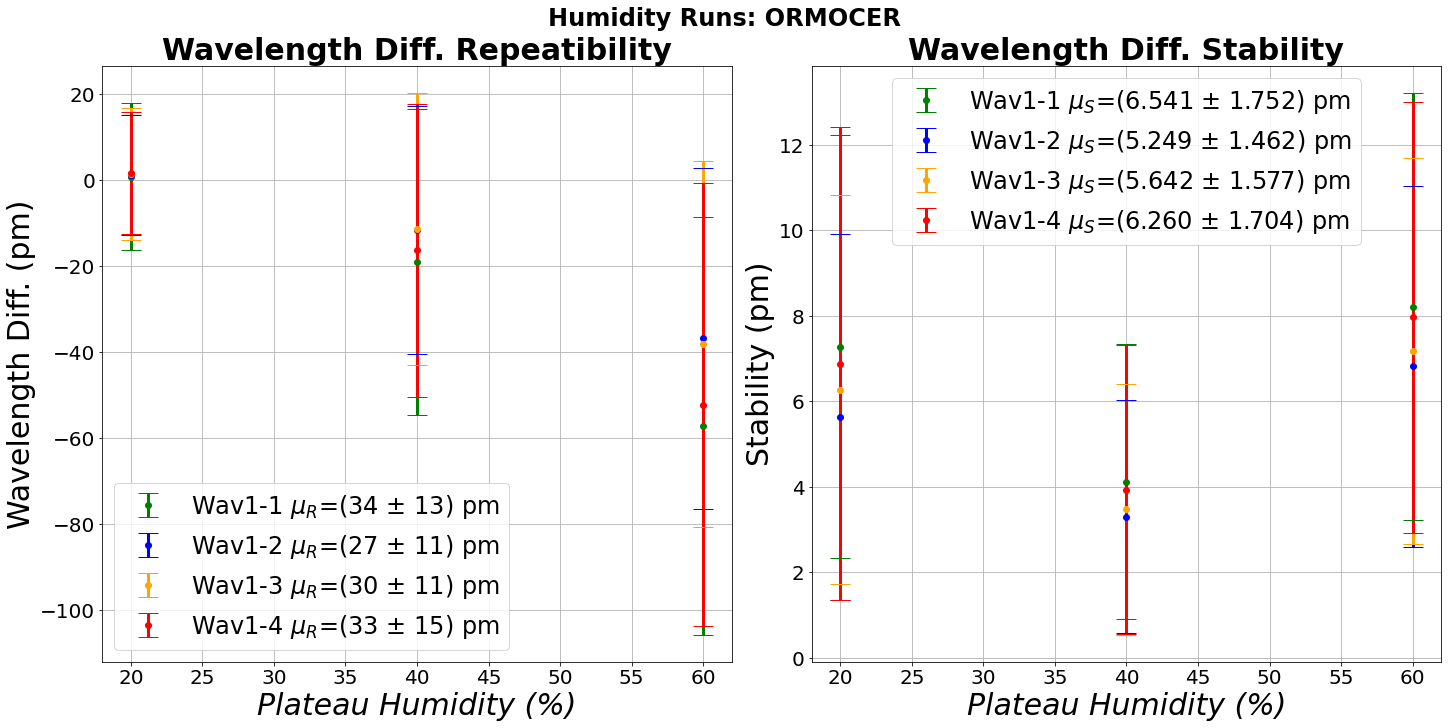

In [4]:
tdates = ["20230323", "20230327", "20230328"]
colors = {"1":"green", "2":"blue", "3":"orange", "4":"red"}
off_teo = {"1":0, "2":5000, "3":10000, "4":15000}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Humidity Runs: ORMOCER", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
for nsens in ["1", "2", "3", "4"]:
    TEMPS, HUMS = {}, {}
    TEMPS_ERR, HUMS_ERR = {}, {}
    for key in plateaus["20230323"].keys():
        TEMPS[str(key.split("_")[0])] = []
        HUMS[str(key.split("_")[0])] = []
        TEMPS_ERR[str(key.split("_")[0])] = []
        HUMS_ERR[str(key.split("_")[0])] = []

    for date in tdates:
        print(date)
        if "202302" in date:
            sens="Wav2-"+nsens
            ref="Wav2-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
        if "202303" in date:
            sens="Wav1-"+nsens
            ref="Wav1-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
        climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                                filetype="peaks",
                                                pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        t0 = plateaus[date]["20_up"][0]
        tf = plateaus[date]["20_up"][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+3000)&(climatic_chamber["Timestamp"]<tf)]
        ref_val = np.mean((tcut[sens]).values)
        for plateau in plateaus[date]:
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            temp = plateau.split("_")[0]
            tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+3000)&(climatic_chamber["Timestamp"]<tf)]
            if len(tcut) < 1000:
                continue
            TEMPS[temp].append(np.mean((tcut[sens]-ref_val).values))
            TEMPS_ERR[temp].append(np.std((tcut[sens]-ref_val).values))

    accuracies, accuracies_err = [], []
    accuracies_stab, accuracies_stab_err = [], []
    temperatures = []
    for temp in TEMPS.keys():
        temperatures.append(int(temp))
        accuracies.append(np.mean(TEMPS[temp]))
        accuracies_err.append(np.std(TEMPS[temp]))
        accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
        accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

    axes[0].errorbar(temperatures, 1e12*np.array(accuracies), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_err), color=colors[nsens],
                    label=r"Wav1-{0} $\mu_R$=({1:.0f} $\pm$ {2:.0f}) pm".format(nsens, 1e12*np.mean(accuracies_err),
                                                                       1e12*np.std(accuracies_err)))
    axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_stab_err), color=colors[nsens],
                    label=r"Wav1-{0} $\mu_S$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens, 1e12*np.mean(accuracies_stab),
                                                                       1e12*np.std(accuracies_stab)))
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("Wavelength Diff. Repeatibility", fontsize=30, fontweight="bold")
    axes[0].set_ylabel("Wavelength Diff. (pm)", fontsize=30)
    axes[0].set_xlabel("Plateau Humidity (%)", fontsize=30, style="italic")    
    axes[1].set_title("Wavelength Diff. Stability", fontsize=30, fontweight="bold")
    axes[1].set_ylabel("Stability (pm)", fontsize=30)
    axes[1].set_xlabel("Plateau Humidity (%)", fontsize=30, style="italic") 

20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:03<00:00,  5.00it/s]


20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:04<00:00,  4.14it/s]


20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:03<00:00,  5.20it/s]


20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:03<00:00,  5.41it/s]


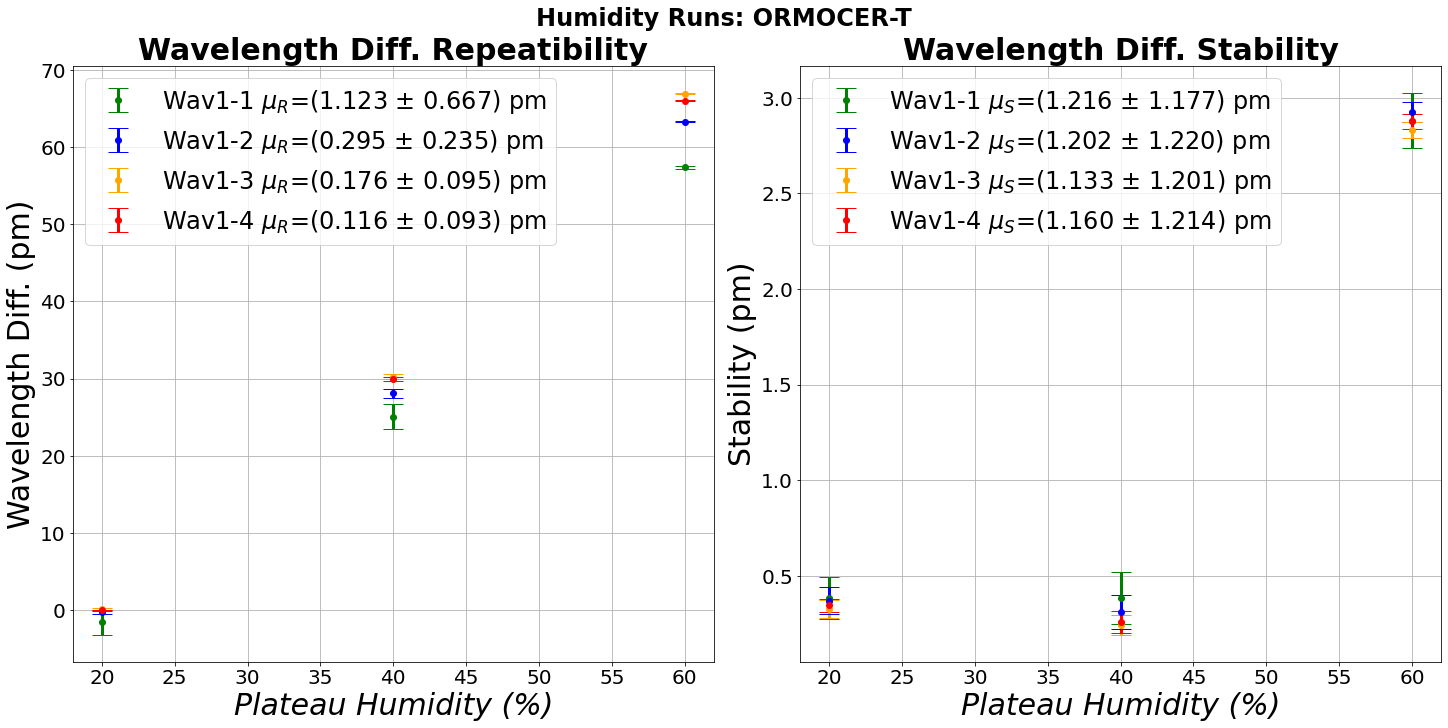

In [7]:
tdates = ["20230328"]
colors = {"1":"green", "2":"blue", "3":"orange", "4":"red"}
off_teo = {"1":0, "2":5000, "3":10000, "4":15000}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Humidity Runs: ORMOCER-T", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
for nsens in ["1", "2", "3", "4"]:
    TEMPS, HUMS = {}, {}
    TEMPS_ERR, HUMS_ERR = {}, {}
    for key in plateaus["20230323"].keys():
        TEMPS[str(key.split("_")[0])] = []
        HUMS[str(key.split("_")[0])] = []
        TEMPS_ERR[str(key.split("_")[0])] = []
        HUMS_ERR[str(key.split("_")[0])] = []

    for date in tdates:
        print(date)
        if "202302" in date:
            sens="Wav1-"+nsens
            ref="Wav1-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
        if "202303" in date:
            sens="Wav2-"+nsens
            ref="Wav2-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
        climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                                filetype="peaks",
                                                pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        t0 = plateaus[date]["20_up"][0]
        tf = plateaus[date]["20_up"][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+3000)&(climatic_chamber["Timestamp"]<tf)]
        ref_val = np.mean((tcut[sens]).values)
        for plateau in plateaus[date]:
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            temp = plateau.split("_")[0]
            tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+3000)&(climatic_chamber["Timestamp"]<tf)]
            if len(tcut) < 1000:
                continue
            TEMPS[temp].append(np.mean((tcut[sens]-ref_val).values))
            TEMPS_ERR[temp].append(np.std((tcut[sens]-ref_val).values))

    accuracies, accuracies_err = [], []
    accuracies_stab, accuracies_stab_err = [], []
    temperatures = []
    for temp in TEMPS.keys():
        temperatures.append(int(temp))
        accuracies.append(np.mean(TEMPS[temp]))
        accuracies_err.append(np.std(TEMPS[temp]))
        accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
        accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

    axes[0].errorbar(temperatures, 1e12*np.array(accuracies), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_err), color=colors[nsens],
                    label=r"Wav1-{0} $\mu_R$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens, 1e12*np.mean(accuracies_err),
                                                                       1e12*np.std(accuracies_err)))
    axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_stab_err), color=colors[nsens],
                    label=r"Wav1-{0} $\mu_S$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens, 1e12*np.mean(accuracies_stab),
                                                                       1e12*np.std(accuracies_stab)))
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("Wavelength Diff. Repeatibility", fontsize=30, fontweight="bold")
    axes[0].set_ylabel("Wavelength Diff. (pm)", fontsize=30)
    axes[0].set_xlabel("Plateau Humidity (%)", fontsize=30, style="italic")    
    axes[1].set_title("Wavelength Diff. Stability", fontsize=30, fontweight="bold")
    axes[1].set_ylabel("Stability (pm)", fontsize=30)
    axes[1].set_xlabel("Plateau Humidity (%)", fontsize=30, style="italic") 

20230323
Keys to read: ['10Av0', '11Av0', '12Av0', '13Av0', '14Av0', '15Av0', '16Av0', '17Av0', '1Av0', '2Av0', '3Av0', '4Av0', '5Av0', '6Av0', '7Av0', '8Av0', '9Av0']


Reading peaks key: Av: 100%|██████████| 17/17 [00:02<00:00,  7.05it/s]


20230327
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:03<00:00,  5.87it/s]


20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:03<00:00,  4.91it/s]


20230323
Keys to read: ['10Av0', '11Av0', '12Av0', '13Av0', '14Av0', '15Av0', '16Av0', '17Av0', '1Av0', '2Av0', '3Av0', '4Av0', '5Av0', '6Av0', '7Av0', '8Av0', '9Av0']


Reading peaks key: Av: 100%|██████████| 17/17 [00:01<00:00,  8.95it/s]


20230327
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:03<00:00,  5.86it/s]


20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]


20230323
Keys to read: ['10Av0', '11Av0', '12Av0', '13Av0', '14Av0', '15Av0', '16Av0', '17Av0', '1Av0', '2Av0', '3Av0', '4Av0', '5Av0', '6Av0', '7Av0', '8Av0', '9Av0']


Reading peaks key: Av: 100%|██████████| 17/17 [00:02<00:00,  8.19it/s]


20230327
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:03<00:00,  5.84it/s]


20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]


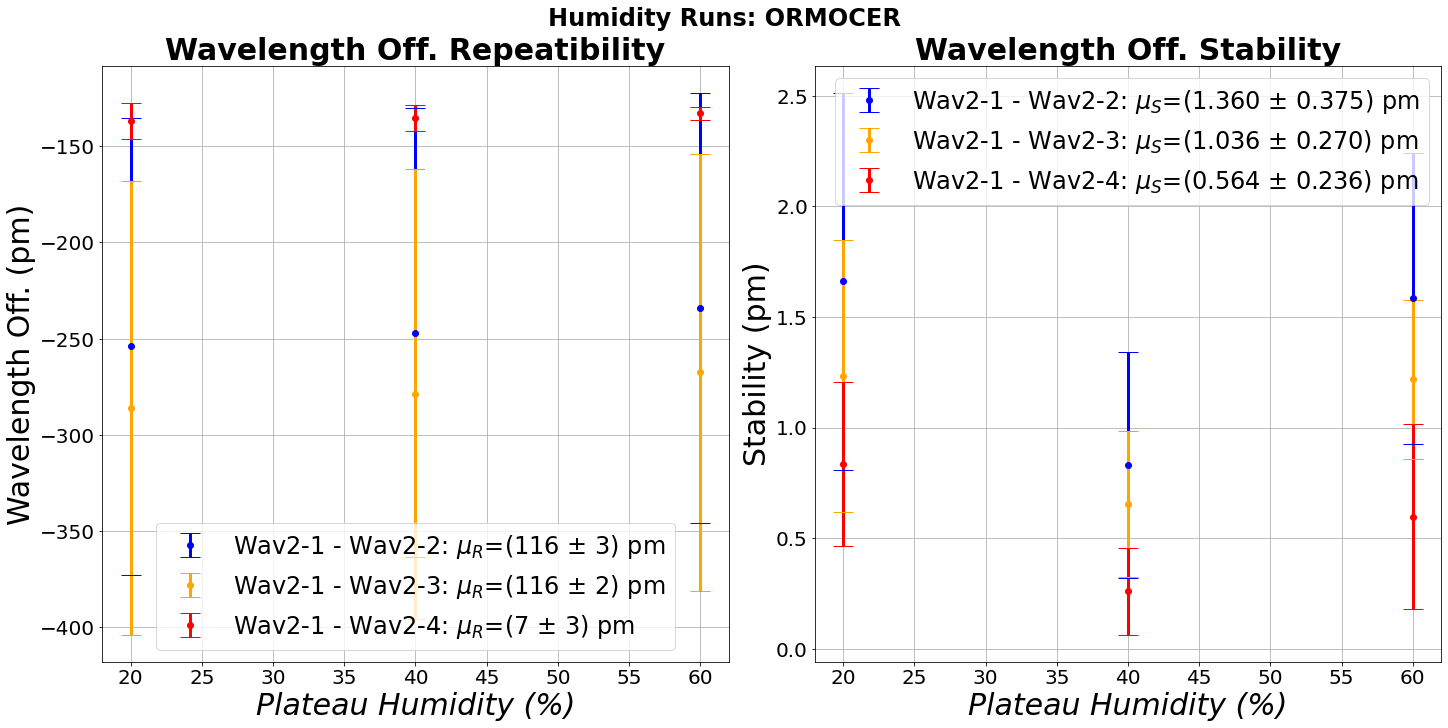

In [10]:
tdates = ["20230323", "20230327", "20230328"]
colors = {"2":"blue", "3":"orange", "4":"red"}
off_teo = {"2":5000, "3":10000, "4":15000}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Humidity Runs: ORMOCER", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
for nsens in ["2", "3", "4"]:
    TEMPS, HUMS = {}, {}
    TEMPS_ERR, HUMS_ERR = {}, {}
    for key in plateaus["20230323"].keys():
        TEMPS[str(key.split("_")[0])] = []
        HUMS[str(key.split("_")[0])] = []
        TEMPS_ERR[str(key.split("_")[0])] = []
        HUMS_ERR[str(key.split("_")[0])] = []

    for date in tdates:
        print(date)
        if "202302" in date:
            sens="Wav2-"+nsens
            ref="Wav2-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
        if "202303" in date:
            sens="Wav1-"+nsens
            ref="Wav1-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
        climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                                filetype="peaks",
                                                pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        for plateau in plateaus[date]:
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            temp = plateau.split("_")[0]
            tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+3000)&(climatic_chamber["Timestamp"]<tf)]
            if len(tcut) < 1000:
                continue
            TEMPS[temp].append(np.mean((tcut[sens]-tcut[ref]).values))
            TEMPS_ERR[temp].append(np.std((tcut[sens]-tcut[ref]).values))

    accuracies, accuracies_err = [], []
    accuracies_stab, accuracies_stab_err = [], []
    temperatures = []
    for temp in TEMPS.keys():
        temperatures.append(int(temp))
        accuracies.append(np.mean(TEMPS[temp]))
        accuracies_err.append(np.std(TEMPS[temp]))
        accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
        accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

    axes[0].errorbar(temperatures, 1e12*np.array(accuracies)-off_teo[nsens], fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_err), color=colors[nsens],
                    label=r"Wav2-1 - Wav2-{0}: $\mu_R$=({1:.0f} $\pm$ {2:.0f}) pm".format(nsens,
                                                                        1e12*np.mean(accuracies_err),
                                                                       1e12*np.std(accuracies_err)))
    axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_stab_err), color=colors[nsens],
                    label=r"Wav2-1 - Wav2-{0}: $\mu_S$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens,
                                                                        1e12*np.mean(accuracies_stab),
                                                                       1e12*np.std(accuracies_stab)))
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("Wavelength Off. Repeatibility", fontsize=30, fontweight="bold")
    axes[0].set_ylabel("Wavelength Off. (pm)", fontsize=30)
    axes[0].set_xlabel("Plateau Humidity (%)", fontsize=30, style="italic")    
    axes[1].set_title("Wavelength Off. Stability", fontsize=30, fontweight="bold")
    axes[1].set_ylabel("Stability (pm)", fontsize=30)
    axes[1].set_xlabel("Plateau Humidity (%)", fontsize=30, style="italic") 

20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]


20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:04<00:00,  4.10it/s]


20230328
Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [00:04<00:00,  4.47it/s]


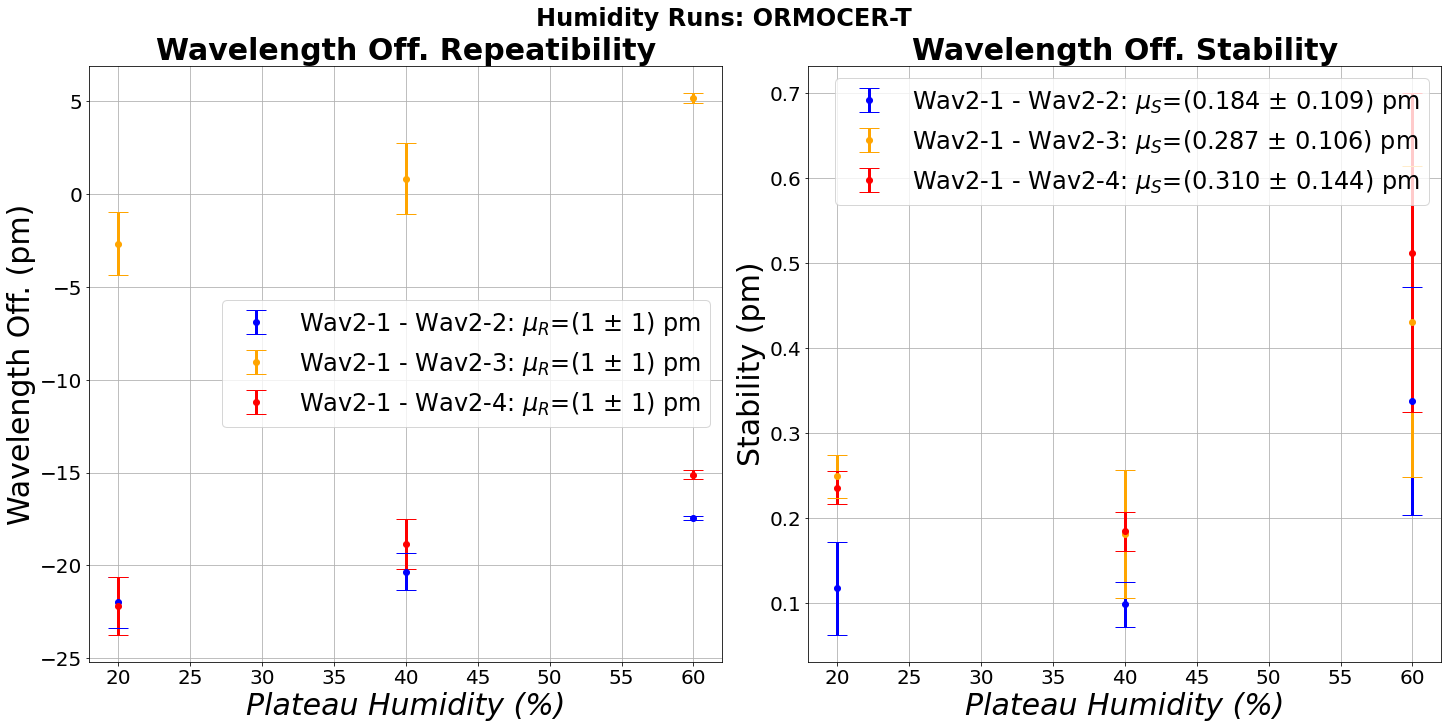

In [11]:
tdates = ["20230328"]
colors = {"2":"blue", "3":"orange", "4":"red"}
off_teo = {"2":5000, "3":10000, "4":15000}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Humidity Runs: ORMOCER-T", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
for nsens in ["2", "3", "4"]:
    TEMPS, HUMS = {}, {}
    TEMPS_ERR, HUMS_ERR = {}, {}
    for key in plateaus["20230323"].keys():
        TEMPS[str(key.split("_")[0])] = []
        HUMS[str(key.split("_")[0])] = []
        TEMPS_ERR[str(key.split("_")[0])] = []
        HUMS_ERR[str(key.split("_")[0])] = []

    for date in tdates:
        print(date)
        if "202302" in date:
            sens="Wav2-"+nsens
            ref="Wav2-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
        if "202303" in date:
            sens="Wav2-"+nsens
            ref="Wav2-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
        climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                                filetype="peaks",
                                                pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        for plateau in plateaus[date]:
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            temp = plateau.split("_")[0]
            tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+3000)&(climatic_chamber["Timestamp"]<tf)]
            if len(tcut) < 1000:
                continue
            TEMPS[temp].append(np.mean((tcut[sens]-tcut[ref]).values))
            TEMPS_ERR[temp].append(np.std((tcut[sens]-tcut[ref]).values))

    accuracies, accuracies_err = [], []
    accuracies_stab, accuracies_stab_err = [], []
    temperatures = []
    for temp in TEMPS.keys():
        temperatures.append(int(temp))
        accuracies.append(np.mean(TEMPS[temp]))
        accuracies_err.append(np.std(TEMPS[temp]))
        accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
        accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

    axes[0].errorbar(temperatures, 1e12*np.array(accuracies)-off_teo[nsens], fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_err), color=colors[nsens],
                    label=r"Wav2-1 - Wav2-{0}: $\mu_R$=({1:.0f} $\pm$ {2:.0f}) pm".format(nsens,
                                                                        1e12*np.mean(accuracies_err),
                                                                       1e12*np.std(accuracies_err)))
    axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_stab_err), color=colors[nsens],
                    label=r"Wav2-1 - Wav2-{0}: $\mu_S$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens,
                                                                        1e12*np.mean(accuracies_stab),
                                                                       1e12*np.std(accuracies_stab)))
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("Wavelength Off. Repeatibility", fontsize=30, fontweight="bold")
    axes[0].set_ylabel("Wavelength Off. (pm)", fontsize=30)
    axes[0].set_xlabel("Plateau Humidity (%)", fontsize=30, style="italic")    
    axes[1].set_title("Wavelength Off. Stability", fontsize=30, fontweight="bold")
    axes[1].set_ylabel("Stability (pm)", fontsize=30)
    axes[1].set_xlabel("Plateau Humidity (%)", fontsize=30, style="italic") 

20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:46<00:00,  1.36it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]


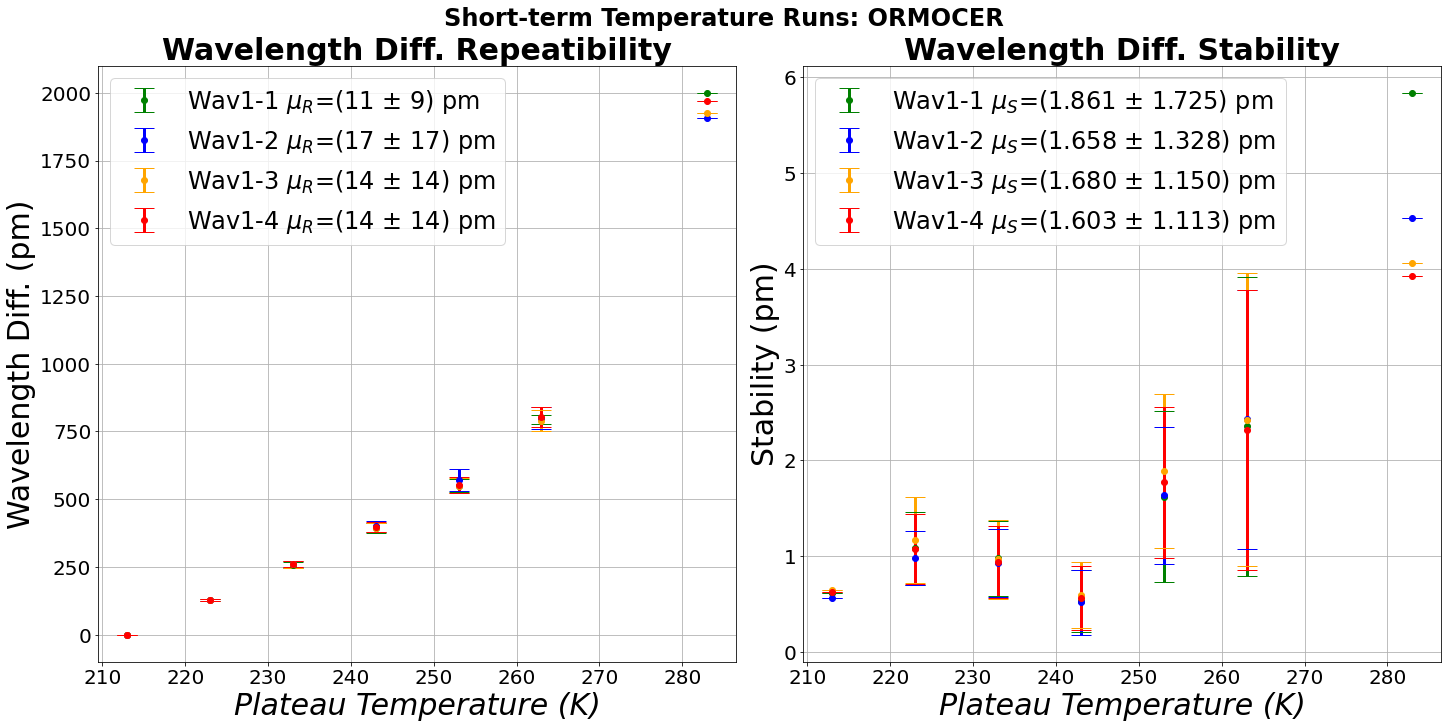

In [25]:
tdates = ["20230224"]
colors = {"1":"green", "2":"blue", "3":"orange", "4":"red"}
off_teo = {"1":0, "2":5000, "3":10000, "4":15000}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Short-term Temperature Runs: ORMOCER", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
for nsens in ["1", "2", "3", "4"]:
    TEMPS, HUMS = {}, {}
    TEMPS_ERR, HUMS_ERR = {}, {}
    for key in plateaus["20230224"].keys():
        if "293" in key:
            continue
        if "273" in key:
            continue
        if str(key.split("_")[1]) == "up":
            continue
        TEMPS[str(key.split("_")[0])] = []
        HUMS[str(key.split("_")[0])] = []
        TEMPS_ERR[str(key.split("_")[0])] = []
        HUMS_ERR[str(key.split("_")[0])] = []

    for date in tdates:
        print(date)
        if "202302" in date:
            sens="Wav2-"+nsens
            ref="Wav2-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
        if "202303" in date:
            sens="Wav1-"+nsens
            ref="Wav1-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
        climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                                filetype="peaks",
                                                pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        t0 = plateaus[date]["213_down"][0]
        tf = plateaus[date]["213_down"][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
        ref_val = np.mean((tcut[sens]).values)
        for plateau in plateaus[date]:
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            temp = plateau.split("_")[0]
            tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
            if len(tcut) < 1000:
                continue
            if temp == "273":
                continue
            TEMPS[temp].append(np.mean((tcut[sens]-ref_val).values))
            TEMPS_ERR[temp].append(np.std((tcut[sens]-ref_val).values))

    accuracies, accuracies_err = [], []
    accuracies_stab, accuracies_stab_err = [], []
    temperatures = []
    for temp in TEMPS.keys():
        temperatures.append(int(temp))
        accuracies.append(np.mean(TEMPS[temp]))
        accuracies_err.append(np.std(TEMPS[temp]))
        accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
        accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

    axes[0].errorbar(temperatures, 1e12*np.array(accuracies), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_err), color=colors[nsens],
                    label=r"Wav1-{0} $\mu_R$=({1:.0f} $\pm$ {2:.0f}) pm".format(nsens, 1e12*np.mean(accuracies_err),
                                                                       1e12*np.std(accuracies_err)))
    axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_stab_err), color=colors[nsens],
                    label=r"Wav1-{0} $\mu_S$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens, 1e12*np.mean(accuracies_stab),
                                                                       1e12*np.std(accuracies_stab)))
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("Wavelength Diff. Repeatibility", fontsize=30, fontweight="bold")
    axes[0].set_ylabel("Wavelength Diff. (pm)", fontsize=30)
    axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
    axes[1].set_title("Wavelength Diff. Stability", fontsize=30, fontweight="bold")
    axes[1].set_ylabel("Stability (pm)", fontsize=30)
    axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:44<00:00,  1.41it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:45<00:00,  1.38it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:53<00:00,  1.18it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:41<00:00,  1.52it/s]


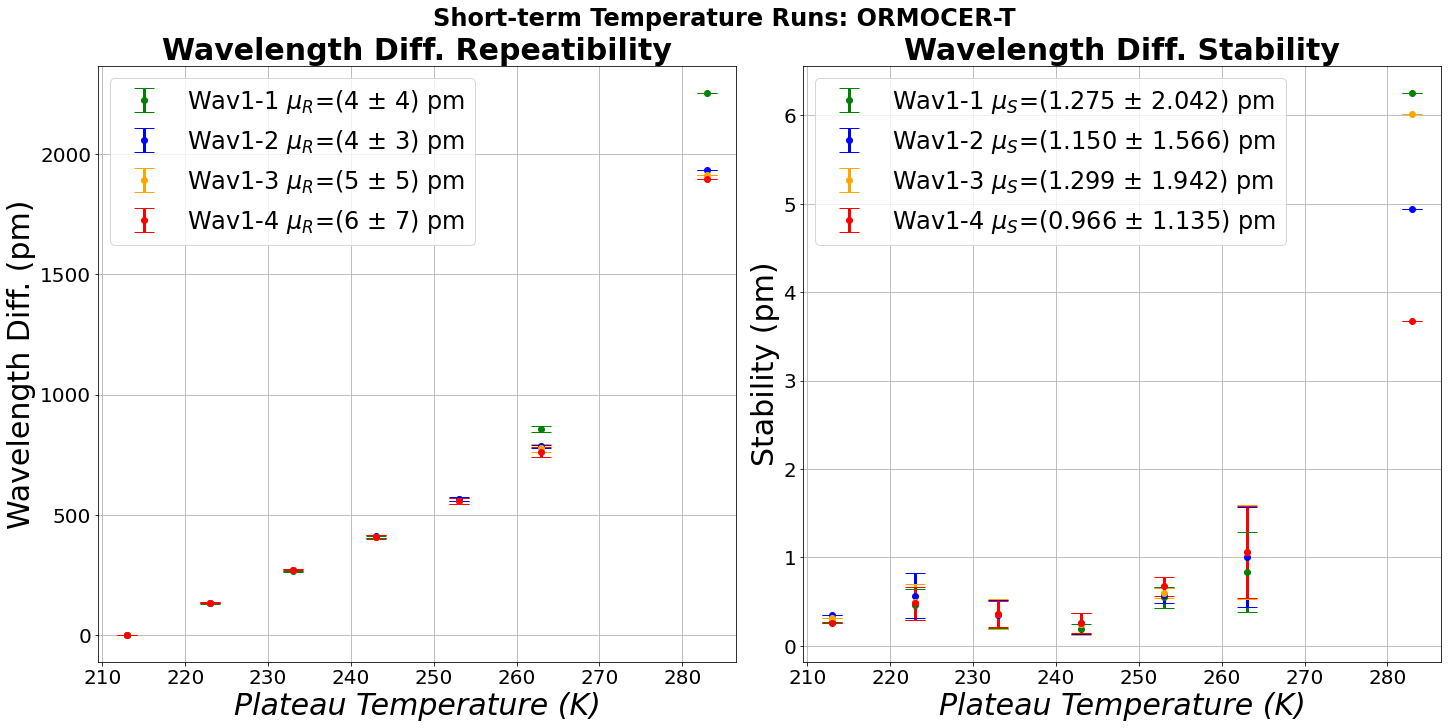

In [26]:
tdates = ["20230224"]
colors = {"1":"green", "2":"blue", "3":"orange", "4":"red"}
off_teo = {"1":0, "2":5000, "3":10000, "4":15000}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Short-term Temperature Runs: ORMOCER-T", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
for nsens in ["1", "2", "3", "4"]:
    TEMPS, HUMS = {}, {}
    TEMPS_ERR, HUMS_ERR = {}, {}
    for key in plateaus["20230224"].keys():
        if "293" in key:
            continue
        if "273" in key:
            continue
        if str(key.split("_")[1]) == "up":
            continue
        TEMPS[str(key.split("_")[0])] = []
        HUMS[str(key.split("_")[0])] = []
        TEMPS_ERR[str(key.split("_")[0])] = []
        HUMS_ERR[str(key.split("_")[0])] = []

    for date in tdates:
        print(date)
        if "202302" in date:
            sens="Wav1-"+nsens
            ref="Wav1-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
        if "202303" in date:
            sens="Wav1-"+nsens
            ref="Wav1-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
        climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                                filetype="peaks",
                                                pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        t0 = plateaus[date]["213_down"][0]
        tf = plateaus[date]["213_down"][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
        ref_val = np.mean((tcut[sens]).values)
        for plateau in plateaus[date]:
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            temp = plateau.split("_")[0]
            tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
            if len(tcut) < 1000:
                continue
            if temp == "273":
                continue
            TEMPS[temp].append(np.mean((tcut[sens]-ref_val).values))
            TEMPS_ERR[temp].append(np.std((tcut[sens]-ref_val).values))

    accuracies, accuracies_err = [], []
    accuracies_stab, accuracies_stab_err = [], []
    temperatures = []
    for temp in TEMPS.keys():
        temperatures.append(int(temp))
        accuracies.append(np.mean(TEMPS[temp]))
        accuracies_err.append(np.std(TEMPS[temp]))
        accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
        accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

    axes[0].errorbar(temperatures, 1e12*np.array(accuracies), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_err), color=colors[nsens],
                    label=r"Wav1-{0} $\mu_R$=({1:.0f} $\pm$ {2:.0f}) pm".format(nsens, 1e12*np.mean(accuracies_err),
                                                                       1e12*np.std(accuracies_err)))
    axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_stab_err), color=colors[nsens],
                    label=r"Wav1-{0} $\mu_S$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens, 1e12*np.mean(accuracies_stab),
                                                                       1e12*np.std(accuracies_stab)))
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("Wavelength Diff. Repeatibility", fontsize=30, fontweight="bold")
    axes[0].set_ylabel("Wavelength Diff. (pm)", fontsize=30)
    axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
    axes[1].set_title("Wavelength Diff. Stability", fontsize=30, fontweight="bold")
    axes[1].set_ylabel("Stability (pm)", fontsize=30)
    axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:49<00:00,  1.27it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:53<00:00,  1.18it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:50<00:00,  1.24it/s]


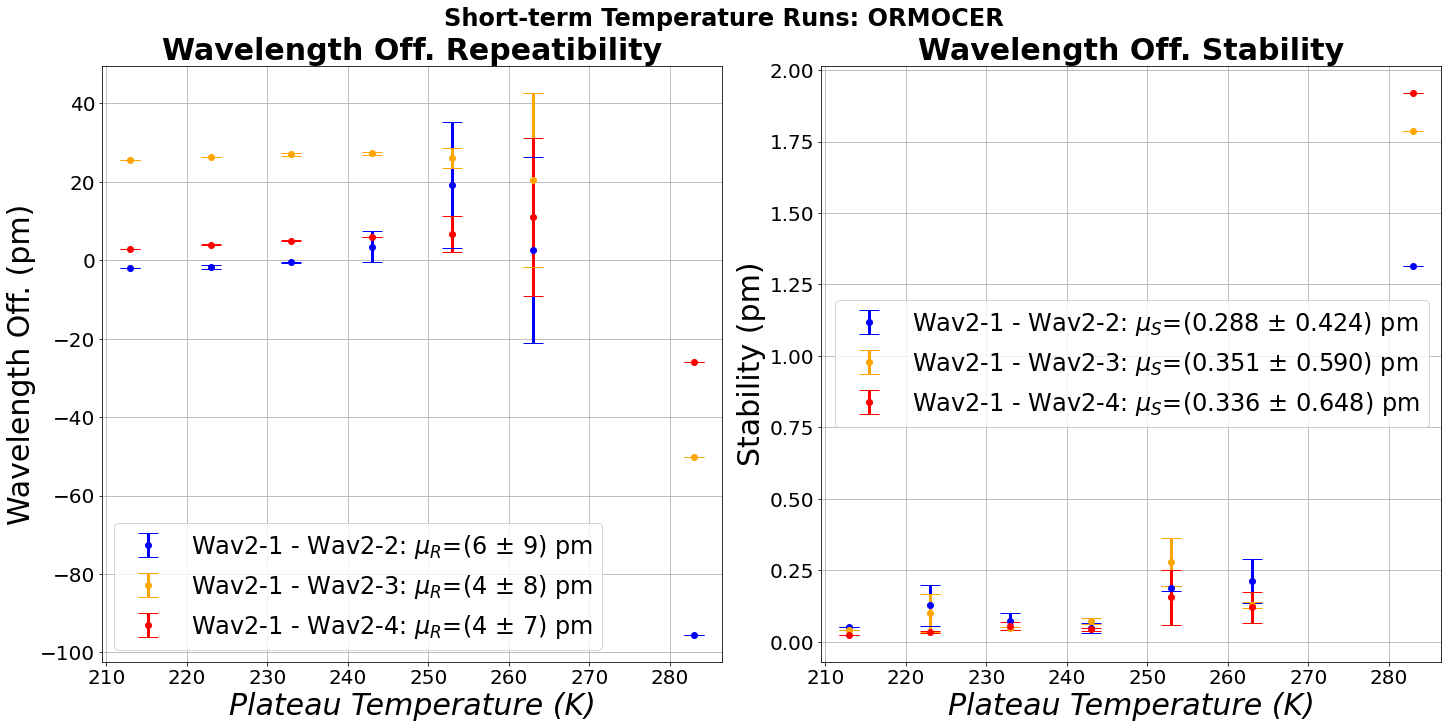

In [27]:
tdates = ["20230224"]
colors = {"2":"blue", "3":"orange", "4":"red"}
off_teo = {"2":5000, "3":10000, "4":15000}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Short-term Temperature Runs: ORMOCER", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
for nsens in ["2", "3", "4"]:
    TEMPS, HUMS = {}, {}
    TEMPS_ERR, HUMS_ERR = {}, {}
    for key in plateaus["20230224"].keys():
        if "293" in key:
            continue
        if "273" in key:
            continue
        if str(key.split("_")[1]) == "up":
            continue
        TEMPS[str(key.split("_")[0])] = []
        HUMS[str(key.split("_")[0])] = []
        TEMPS_ERR[str(key.split("_")[0])] = []
        HUMS_ERR[str(key.split("_")[0])] = []

    for date in tdates:
        print(date)
        if "202302" in date:
            sens="Wav2-"+nsens
            ref="Wav2-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
        if "202303" in date:
            sens="Wav1-"+nsens
            ref="Wav1-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
        climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                                filetype="peaks",
                                                pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        for plateau in plateaus[date]:
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            temp = plateau.split("_")[0]
            tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
            if len(tcut) < 1000:
                continue
            if temp == "273":
                continue
            TEMPS[temp].append(np.mean((tcut[sens]-tcut[ref]).values))
            TEMPS_ERR[temp].append(np.std((tcut[sens]-tcut[ref]).values))

    accuracies, accuracies_err = [], []
    accuracies_stab, accuracies_stab_err = [], []
    temperatures = []
    for temp in TEMPS.keys():
        temperatures.append(int(temp))
        accuracies.append(np.mean(TEMPS[temp]))
        accuracies_err.append(np.std(TEMPS[temp]))
        accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
        accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

    axes[0].errorbar(temperatures, 1e12*np.array(accuracies)-off_teo[nsens], fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_err), color=colors[nsens],
                    label=r"Wav2-1 - Wav2-{0}: $\mu_R$=({1:.0f} $\pm$ {2:.0f}) pm".format(nsens,
                                                                        1e12*np.mean(accuracies_err),
                                                                       1e12*np.std(accuracies_err)))
    axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_stab_err), color=colors[nsens],
                    label=r"Wav2-1 - Wav2-{0}: $\mu_S$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens,
                                                                        1e12*np.mean(accuracies_stab),
                                                                       1e12*np.std(accuracies_stab)))
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("Wavelength Off. Repeatibility", fontsize=30, fontweight="bold")
    axes[0].set_ylabel("Wavelength Off. (pm)", fontsize=30)
    axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
    axes[1].set_title("Wavelength Off. Stability", fontsize=30, fontweight="bold")
    axes[1].set_ylabel("Stability (pm)", fontsize=30)
    axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 

20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:46<00:00,  1.36it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:41<00:00,  1.51it/s]


20230224
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [00:44<00:00,  1.40it/s]


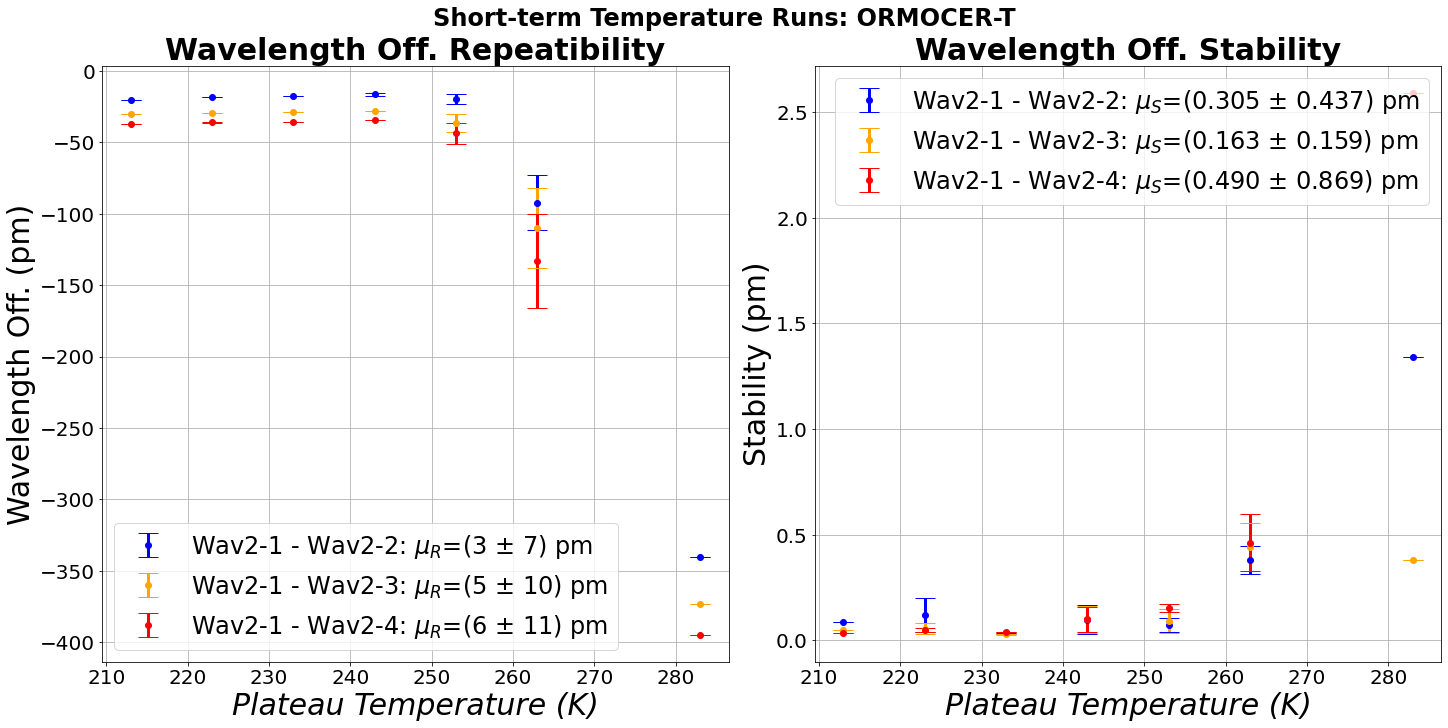

In [28]:
tdates = ["20230224"]
colors = {"2":"blue", "3":"orange", "4":"red"}
off_teo = {"2":5000, "3":10000, "4":15000}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Short-term Temperature Runs: ORMOCER-T", fontweight="bold")
fig.set_size_inches((20,10))
#Creating a dictionary that will contain the accuracies and humidities for each of the plateaus
for nsens in ["2", "3", "4"]:
    TEMPS, HUMS = {}, {}
    TEMPS_ERR, HUMS_ERR = {}, {}
    for key in plateaus["20230224"].keys():
        if "293" in key:
            continue
        if "273" in key:
            continue
        if str(key.split("_")[1]) == "up":
            continue
        TEMPS[str(key.split("_")[0])] = []
        HUMS[str(key.split("_")[0])] = []
        TEMPS_ERR[str(key.split("_")[0])] = []
        HUMS_ERR[str(key.split("_")[0])] = []

    for date in tdates:
        print(date)
        if "202302" in date:
            sens="Wav1-"+nsens
            ref="Wav1-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
        if "202303" in date:
            sens="Wav2-"+nsens
            ref="Wav2-1"
            path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
        climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                                filetype="peaks",
                                                pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
        for plateau in plateaus[date]:
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            temp = plateau.split("_")[0]
            tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+tau)&(climatic_chamber["Timestamp"]<tf)]
            if len(tcut) < 1000:
                continue
            if temp == "273":
                continue
            TEMPS[temp].append(np.mean((tcut[sens]-tcut[ref]).values))
            TEMPS_ERR[temp].append(np.std((tcut[sens]-tcut[ref]).values))

    accuracies, accuracies_err = [], []
    accuracies_stab, accuracies_stab_err = [], []
    temperatures = []
    for temp in TEMPS.keys():
        temperatures.append(int(temp))
        accuracies.append(np.mean(TEMPS[temp]))
        accuracies_err.append(np.std(TEMPS[temp]))
        accuracies_stab.append(np.mean(TEMPS_ERR[temp]))
        accuracies_stab_err.append(np.std(TEMPS_ERR[temp]))

    axes[0].errorbar(temperatures, 1e12*np.array(accuracies)-off_teo[nsens], fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_err), color=colors[nsens],
                    label=r"Wav2-1 - Wav2-{0}: $\mu_R$=({1:.0f} $\pm$ {2:.0f}) pm".format(nsens,
                                                                        1e12*np.mean(accuracies_err),
                                                                       1e12*np.std(accuracies_err)))
    axes[1].errorbar(temperatures, 1e12*np.array(accuracies_stab), fmt="o", capsize=10,
                          yerr=1e12*np.array(accuracies_stab_err), color=colors[nsens],
                    label=r"Wav2-1 - Wav2-{0}: $\mu_S$=({1:.3f} $\pm$ {2:.3f}) pm".format(nsens,
                                                                        1e12*np.mean(accuracies_stab),
                                                                       1e12*np.std(accuracies_stab)))
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title("Wavelength Off. Repeatibility", fontsize=30, fontweight="bold")
    axes[0].set_ylabel("Wavelength Off. (pm)", fontsize=30)
    axes[0].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic")    
    axes[1].set_title("Wavelength Off. Stability", fontsize=30, fontweight="bold")
    axes[1].set_ylabel("Stability (pm)", fontsize=30)
    axes[1].set_xlabel("Plateau Temperature (K)", fontsize=30, style="italic") 